In [1]:
# Group Case Study - Ecommerce ElecKart 
# pip install jupyterthemes
# pip install --upgrade jupyterthemes


In [2]:
# import Pandas libraries

import numpy as np
import pandas as pd

# Ignore Warnings functions
import warnings
warnings.filterwarnings('ignore')

#import For Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
#rng = np.random.RandomState(0)
#x = np.linspace(0, 10, 500)
#y = np.cumsum(rng.randn(500, 6), 0)

# Pandas Settings
# pd.options.display.float_format = '{:.1f}'.format
# pd.options.display.float_format = '{:.1f}'.format
# pd.options.display.float_format = '{:.1f}'.format

pd.set_option('display.max_rows', 40000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Other needed Libraries imports
from scipy.stats import norm
from datetime import datetime
import re



In [3]:
#Load and Read data 
## Reading the main ConsumerElectronics.csv excel file with the Pandas Library 
#Downloaded from Google DriveConsumerElectronics.csv 
#into a  Pandas dataframe
ConsumerElectronics_df = pd.read_csv('ConsumerElectronics.csv')
ConsumerElectronics_df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [4]:
# Key Observations on the attributes on the Excel file

# deliverycdays = The Total Number of days taken for the item to reach the customer from the date of ordering
# deliverybdays = The days taken for the item to be picked up from the warehouse to the shipping destination
# SKU =   SKU number is a unique code that is assigned to each product in The inventory



In [5]:
# Load the Product data file into the Pandas dataframe

ItemsandProduct_lists = pd.read_excel('Media data and other information.xlsx', sheet_name='Product List')

ItemsandProduct_lists.columns.values[1]='product_analytic_vertical'

ItemsandProduct_lists.drop(ItemsandProduct_lists.columns[0], axis=1, inplace = True)

ItemsandProduct_lists.head()

,product_analytic_vertical,Frequency,Percent
0,\N,5828,0.353464
1,AmplifierReceiver,4056,0.245994
2,AudioMP3Player,112892,6.846819
3,Binoculars,14599,0.885419
4,BoomBox,2879,0.174609


In [6]:
# Analyse Media Investment excel with Pandas Dataframe 
Marketing_Media_investment = pd.read_excel('Media data and other information.xlsx', sheet_name='Media Investment', skiprows=2)
Marketing_Media_investment.drop(Marketing_Media_investment.columns[0], axis=1, inplace = True)
Marketing_Media_investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015.0,7.0,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,NaN,NaN
1,2015.0,8.0,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,NaN,NaN
2,2015.0,9.0,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,NaN,NaN
3,2015.0,10.0,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN
4,2015.0,11.0,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,NaN,NaN


In [7]:
# Reading and Analyse the Sales data calender into the Pandas Dataframe



sale_calendar_Days = pd.read_excel('Media data and other information.xlsx', sheet_name='Special Sale Calendar', \
                              skiprows=0, skipfooter=2)

sale_calendar_Days.drop(sale_calendar_Days.columns[0], axis=1, inplace = True)

sale_calendar_Days.iloc[1:6, 0] = sale_calendar_Days.iloc[0, 0]
sale_calendar_Days.iloc[7:, 0] = sale_calendar_Days.iloc[6, 0]

sale_calendar_Days

,Unnamed: 1,Sales Calendar
0,2015.0,(18-19th July)
1,2015.0,(15-17th Aug)
2,2015.0,(28-30th Aug)
3,2015.0,(17-15th Oct)
4,2015.0,(7-14th Nov)
5,2015.0,(25th Dec'15 - 3rd Jan'16)
6,2016.0,(20-22 Jan)
7,2016.0,(1-2 Feb)
8,2016.0,(20-21 Feb)
9,2016.0,(14-15 Feb)


In [8]:
# Analyse the Net Promoter score NPS with the Pandas dataframe 
net_promoter_score = pd.read_excel('Media data and other information.xlsx', sheet_name='Monthly NPS Score', \
                              skiprows=0)

net_promoter_score.columns.values[0]='score'

net_promoter_score

,score,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
0,NPS,54.599588,59.987101,46.925419,44.398389,47.0,45.8,47.093031,50.327406,49.02055,51.827605,47.306951,50.516687
1,Stock Index,1177.000000,1206.000000,1101.000000,1210.000000,1233.0,1038.0,1052.000000,1222.000000,1015.00000,1242.000000,1228.000000,1194.000000


In [9]:
# Analyse the Product details from the Microsoft Word format file via Pandas data frames
#pip install --pre python-docx 

#from __future__ import print_function
#from mailmerge import MailMerge
#from datetime import date
#import pandas as pd
#import io
#import csv
#from docx import Document
import pandas as pd
import io
import csv
from docx import Document

def read_docx_tables(filename, tab_id=None, **kwargs):
    """
    parse table(s) from a Word Document (.docx) into Pandas DataFrame(s)

    Parameters:
        filename:   file name of a Word Document

        tab_id:     parse a single table with the index: [tab_id] (counting from 0).
                    When [None] - return a list of DataFrames (parse all tables)

        kwargs:     arguments to pass to `pd.read_csv()` function

    Return: a single DataFrame if tab_id != None or a list of DataFrames otherwise
    """
    def read_docx_tab(tab, **kwargs):
        vf = io.StringIO()
        writer = csv.writer(vf)
        for row in tab.rows:
            writer.writerow(cell.text for cell in row.cells)
        vf.seek(0)
        return pd.read_csv(vf, **kwargs)

    doc = Document(filename)
    if tab_id is None:
        return [read_docx_tab(tab, **kwargs) for tab in doc.tables]
    else:
        try:
            return read_docx_tab(doc.tables[tab_id], **kwargs)
        except IndexError:
            print('Error: specified [tab_id]: {}  does not exist.'.format(tab_id))
            raise

dfs = read_docx_tables('Product Details.docx')

dfs[0]

,super_category,category,sub_category,vertical
0,CE,Camera,Camera,Camcorders
1,CE,Camera,Camera,DSLR
2,CE,Camera,Camera,Instant Cameras
3,CE,Camera,Camera,Point & Shoot
4,CE,Camera,Camera,SportsAndAction
5,CE,CameraAccessory,CameraAccessory,Binoculars
6,CE,CameraAccessory,CameraAccessory,CameraAccessory
7,CE,CameraAccessory,CameraAccessory,CameraBag
8,CE,CameraAccessory,CameraAccessory,CameraBattery
9,CE,CameraAccessory,CameraAccessory,CameraBatteryCharger


In [10]:
# Remove and drop the
# the unwanted Rows and Colums 

product_details = pd.DataFrame(dfs[0])

product_details.drop(product_details.columns[0], axis=1, inplace = True)

product_details.head()

,category,sub_category,vertical
0,Camera,Camera,Camcorders
1,Camera,Camera,DSLR
2,Camera,Camera,Instant Cameras
3,Camera,Camera,Point & Shoot
4,Camera,Camera,SportsAndAction


In [11]:
# Process and Clean the Data

#Inventory_Info_Details.drop(Inventory_Info_Details.columns[0], axis=1, inplace = True)



In [12]:
ConsumerElectronics_df.head()


,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [13]:
ConsumerElectronics_df.dtypes


fsn_id                              object
order_date                          object
Year                                 int64
Month                                int64
order_id                           float64
order_item_id                      float64
gmv                                 object
units                                int64
deliverybdays                       object
deliverycdays                       object
s1_fact.order_payment_type          object
sla                                  int64
cust_id                             object
pincode                             object
product_analytic_super_category     object
product_analytic_category           object
product_analytic_sub_category       object
product_analytic_vertical           object
product_mrp                          int64
product_procurement_sla              int64
dtype: object

In [14]:
# Fix the data types
# #  Covert Strings to date and time
ConsumerElectronics_df['order_date'] =  pd.to_datetime(ConsumerElectronics_df['order_date'], format='%Y-%m-%d %H:%M:%S')

In [15]:
#  Convert Int to string Operations

ConsumerElectronics_df[['order_id','order_item_id']] = ConsumerElectronics_df[['order_id','order_item_id']].astype(object)

In [16]:
# Convert Int to string Operations for Year and Month


ConsumerElectronics_df[['Year','Month']] = ConsumerElectronics_df[['Year','Month']].astype(str)


In [17]:
#As we have observed "\N" value in Delivery days from the date of Order to the Customer
#  and Delivery days from the item picked up from Warehouse to the customer
# is equal to 0, we will replace/impute the null values with value = 0

ConsumerElectronics_df['deliverybdays'] = pd.to_numeric(ConsumerElectronics_df['deliverybdays'], errors='coerce')
ConsumerElectronics_df['deliverybdays'].fillna(value=0, inplace=True)

ConsumerElectronics_df['deliverycdays'] = pd.to_numeric(ConsumerElectronics_df['deliverycdays'], errors='coerce')
ConsumerElectronics_df['deliverycdays'].fillna(value=0, inplace=True)

In [18]:

# Convert String to the  int Operations

ConsumerElectronics_df['gmv'] = pd.to_numeric(ConsumerElectronics_df['gmv'], errors='coerce')

In [19]:
ConsumerElectronics_df.dtypes


fsn_id                                     object
order_date                         datetime64[ns]
Year                                       object
Month                                      object
order_id                                   object
order_item_id                              object
gmv                                       float64
units                                       int64
deliverybdays                             float64
deliverycdays                             float64
s1_fact.order_payment_type                 object
sla                                         int64
cust_id                                    object
pincode                                    object
product_analytic_super_category            object
product_analytic_category                  object
product_analytic_sub_category              object
product_analytic_vertical                  object
product_mrp                                 int64
product_procurement_sla                     int64


In [20]:
#  Finding out Unique value frequencies Operations

unique_distinct_val = pd.DataFrame(ConsumerElectronics_df.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)

unique_distinct_val['dtype'] = pd.DataFrame(ConsumerElectronics_df.dtypes)

unique_distinct_val

,Unique Value Count,dtype
product_analytic_super_category,1,object
Year,2,object
s1_fact.order_payment_type,2,object
product_analytic_category,5,object
Month,12,object
product_analytic_sub_category,14,object
product_procurement_sla,17,int64
units,27,int64
sla,60,int64
product_analytic_vertical,74,object


In [21]:
initial_shape = ConsumerElectronics_df.shape
initial_shape

(1648824, 20)

In [22]:
# Invalid Values fixing
# Finxing  incorrect GMV values  product_mrp * units
# Values in which GMV values are greater than MRP * units is incorrect should be fixed
print(ConsumerElectronics_df.loc[ConsumerElectronics_df['product_mrp'] * ConsumerElectronics_df['units'] < ConsumerElectronics_df['gmv']].shape[0])

print(round(100*(ConsumerElectronics_df.loc[ConsumerElectronics_df['product_mrp'] * ConsumerElectronics_df['units'] < ConsumerElectronics_df['gmv']].shape[0] / ConsumerElectronics_df.shape[0]), 2))

38569
2.34


In [23]:
# in the dataframe  the GMV value is greater than the MRP * units There are 38569 records (2.34%) from the data
# the faulty mrp values with gmv/units should be processd for replacing missing data 
# update  the values of the column wtih reference of another column
ConsumerElectronics_df.product_mrp = np.where(ConsumerElectronics_df['product_mrp'] < ConsumerElectronics_df['gmv'] / ConsumerElectronics_df['units'], \
                                   ConsumerElectronics_df['gmv'] / ConsumerElectronics_df['units'], ConsumerElectronics_df['product_mrp'])

ConsumerElectronics_df.shape

(1648824, 20)

In [24]:
# Checking deliverybdays & deliverycdays for any negative value
print(ConsumerElectronics_df.loc[ConsumerElectronics_df['deliverybdays'] < 0].shape[0])
print(round(100*(ConsumerElectronics_df.loc[ConsumerElectronics_df['deliverybdays'] < 0].shape[0]/ConsumerElectronics_df.shape[0]),4))
print(ConsumerElectronics_df.loc[ConsumerElectronics_df['deliverycdays'] < 0].shape[0])
print(round(100*(ConsumerElectronics_df.loc[ConsumerElectronics_df['deliverycdays'] < 0].shape[0]/ConsumerElectronics_df.shape[0]),4))

38
0.0023
39
0.0024


In [25]:
#Dropping the negative value data

ConsumerElectronics_df = ConsumerElectronics_df.loc[(ConsumerElectronics_df['deliverybdays'] >= 0) & (ConsumerElectronics_df['deliverycdays'] >= 0)]
ConsumerElectronics_df.reset_index(drop=True, inplace=True)

In [26]:
# Checking product_procurement_sla for any negative value
print(ConsumerElectronics_df.loc[ConsumerElectronics_df['product_procurement_sla'] < 0].shape[0])
print(round(100*(ConsumerElectronics_df.loc[ConsumerElectronics_df['product_procurement_sla'] < 0].shape[0]/ConsumerElectronics_df.shape[0]),4))


75986
4.6086


In [27]:
#Dropping the negative value data
ConsumerElectronics_df = ConsumerElectronics_df.loc[(ConsumerElectronics_df['product_procurement_sla'] >= 0)]
ConsumerElectronics_df.reset_index(drop=True, inplace=True)

In [28]:
# Processing the large values for product_procurement_sla
ConsumerElectronics_df[['product_procurement_sla']].describe().T

,count,mean,std,min,25%,50%,75%,max
product_procurement_sla,1572799.0,5.712887,54.724168,0.0,2.0,2.0,3.0,1000.0


In [29]:
ConsumerElectronics_df.shape

(1572799, 20)

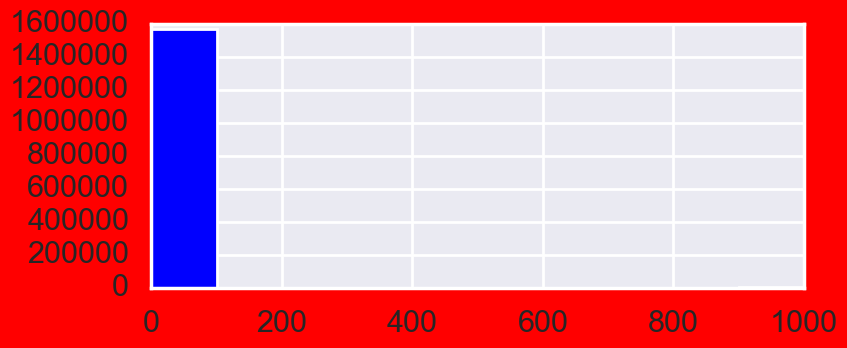

In [30]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns


plt.figure(figsize=(9, 4), dpi=100, facecolor='r', edgecolor='g', frameon='True')
#set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_style("dark") 


sns.set_context('poster')


ConsumerElectronics_df.product_procurement_sla.hist()

plt.tight_layout()

plt.show()

In [31]:
ConsumerElectronics_df.product_procurement_sla.value_counts()

2       528406
1       308504
3       303349
5       222097
4       120190
0        42459
6        18559
7        11746
15        6184
14        5281
1000      4745
13         526
8          523
9           97
10          73
12          60
Name: product_procurement_sla, dtype: int64

In [32]:
print(ConsumerElectronics_df.loc[ConsumerElectronics_df['product_procurement_sla'] >= 1000].shape[0])

print(round(100*(ConsumerElectronics_df.loc[ConsumerElectronics_df['product_procurement_sla'] >= 1000].shape[0]/ConsumerElectronics_df.shape[0]),4))

4745
0.3017


In [33]:
# as we find with prodcurment SLA More than thousand There are 4,745 records  in the dataframe 
# since we can consider this as void data as their cant be SLA More than 1000
# we will now Retain Only Rows than are having less than 1000 SLA


ConsumerElectronics_df = ConsumerElectronics_df.loc[(ConsumerElectronics_df['product_procurement_sla'] < 1000)]
ConsumerElectronics_df.head()



,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.4193e+15,3.4193e+15,6400.0,1,0.0,0.0,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190.0,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.42083e+15,1.42083e+15,6900.0,1,0.0,0.0,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190.0,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.42191e+15,2.42191e+15,1990.0,1,0.0,0.0,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099.0,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.41659e+15,4.41659e+15,1690.0,1,0.0,0.0,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099.0,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.41953e+15,4.41953e+15,1618.0,1,0.0,0.0,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099.0,3


In [34]:
ConsumerElectronics_df.shape

(1568054, 20)

In [35]:
ConsumerElectronics_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1568054 entries, 0 to 1572798
Data columns (total 20 columns):
fsn_id                             1568054 non-null object
order_date                         1568054 non-null datetime64[ns]
Year                               1568054 non-null object
Month                              1568054 non-null object
order_id                           1568054 non-null object
order_item_id                      1568054 non-null object
gmv                                1563535 non-null float64
units                              1568054 non-null int64
deliverybdays                      1568054 non-null float64
deliverycdays                      1568054 non-null float64
s1_fact.order_payment_type         1568054 non-null object
sla                                1568054 non-null int64
cust_id                            1568054 non-null object
pincode                            1568054 non-null object
product_analytic_super_category    1568054 non-null 

In [36]:
# Clean and De-Duplicate Data 
# Convert all string columns lower case

category_columns = [cname for cname in ConsumerElectronics_df.columns if ConsumerElectronics_df[cname].dtype == "object"]

category_columns



['fsn_id',
 'Year',
 'Month',
 'order_id',
 'order_item_id',
 's1_fact.order_payment_type',
 'cust_id',
 'pincode',
 'product_analytic_super_category',
 'product_analytic_category',
 'product_analytic_sub_category',
 'product_analytic_vertical']

In [37]:
# Process filtering with the string columns Operations

category_columns = ['fsn_id',
 's1_fact.order_payment_type',
 'product_analytic_super_category',
 'product_analytic_category',
 'product_analytic_sub_category',
 'product_analytic_vertical']

for col in category_columns:
    ConsumerElectronics_df[col] = ConsumerElectronics_df[col].str.lower()

In [38]:
# investigating the unique values via spell checking

category_columns = [cname for cname in ConsumerElectronics_df.columns if ConsumerElectronics_df[cname].dtype == "object"]

ConsumerElectronics_df[category_columns].describe()

,fsn_id,Year,Month,order_id,order_item_id,s1_fact.order_payment_type,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical
count,1568054,1568054,1568054,1.568054e+06,1.568054e+06,1568054,1568054,1.568054e+06,1568054,1568054,1568054,1568054
unique,20620,2,12,1.430145e+06,1.410408e+06,2,1199714,1.288000e+04,1,5,14,73
top,seldxmc3jnmtqmgv,2016,9,1.560047e+15,3.000373e+17,cod,,-9.031043e+18,ce,entertainmentsmall,speaker,mobilespeaker
freq,17859,835309,198112,3.400000e+01,3.800000e+01,1130205,4519,7.519000e+03,1568054,897157,501816,249170


In [39]:
# columns with less cardinality 

selected_category_columns = ['s1_fact.order_payment_type', 'product_analytic_super_category', 'product_analytic_category', 'product_analytic_sub_category', 'product_analytic_vertical']

for col in selected_category_columns:
    print('\n#####')
    print('distinct value for ' + str(col))
    print('#######')
    print(pd.Series(ConsumerElectronics_df[col].unique()).sort_values(ascending=False))


#####
distinct value for s1_fact.order_payment_type
#######
1    prepaid
0        cod
dtype: object

#####
distinct value for product_analytic_super_category
#######
0    ce
dtype: object

#####
distinct value for product_analytic_category
#######
1        gaminghardware
3             gamecddvd
2    entertainmentsmall
0       cameraaccessory
4                camera
dtype: object

#####
distinct value for product_analytic_sub_category
#######
12           tvvideosmall
2                 speaker
10            hometheatre
3               homeaudio
9           gamingconsole
1         gamingaccessory
13    gamemembershipcards
7                    game
4           camerastorage
0         cameraaccessory
8                  camera
6          audiomp3player
11         audioaccessory
5       amplifierreceiver
dtype: object

#####
distinct value for product_analytic_vertical
#######
59              voicerecorder
60                videoplayer
58               videoglasses
12        tvoutcableacces

In [40]:
# Remove duplicate rows
ConsumerElectronics_df.shape


(1568054, 20)

In [41]:
print(ConsumerElectronics_df.duplicated().value_counts()[1])

print(round(100*(ConsumerElectronics_df.duplicated().value_counts()[1]/ConsumerElectronics_df.shape[0]),4))

99283
6.3316


In [42]:
# as we found  1468771 rows have duplicates. lets process and drop the duplicates

ConsumerElectronics_df.drop_duplicates(keep='first', inplace=True)
ConsumerElectronics_df.shape

(1468771, 20)

In [43]:
ConsumerElectronics_df.duplicated().value_counts()


False    1468771
dtype: int64

In [44]:
# Processing  Nulls
#  Let us do checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(ConsumerElectronics_df.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(ConsumerElectronics_df.isnull().sum()/ConsumerElectronics_df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])

pd.concat([total, percentage], axis = 1).head()

,Total,Percentage
gmv,3705,0.25
product_procurement_sla,0,0.00
product_mrp,0,0.00
order_date,0,0.00
Year,0,0.00


In [45]:
# as observed their are  null values in the gmv column.

# also  there are a lot of  Whitespaces present in  the columns in the dataframe.

# convert these white spaces to Nans and process
ConsumerElectronics_df.replace(' ', np.nan, inplace = True)

In [46]:
#  total count and percentage of null values in  columns from dataframe.

total = pd.DataFrame(ConsumerElectronics_df.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(ConsumerElectronics_df.isnull().sum()/ConsumerElectronics_df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1).head()

,Total,Percentage
pincode,3705,0.25
cust_id,3705,0.25
gmv,3705,0.25
product_procurement_sla,0,0.00
deliverybdays,0,0.00


In [47]:
# since the column cant be removed let us remove the rows with large  missing values
ConsumerElectronics_df = ConsumerElectronics_df[~pd.isnull(ConsumerElectronics_df['gmv'])]
org_shape = ConsumerElectronics_df.shape
org_shape

(1465066, 20)

In [48]:
# trying to find out the total count and percentage of null values in every columns of the dataframe

total = pd.DataFrame(ConsumerElectronics_df.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(ConsumerElectronics_df.isnull().sum()/ConsumerElectronics_df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1).head()

,Total,Percentage
product_procurement_sla,0,0.0
product_mrp,0,0.0
order_date,0,0.0
Year,0,0.0
Month,0,0.0


In [49]:
#  Ok now finally their is no more Null data in the data frame
#  Hence as we have to use the data from July 2015 to June 2016 for the Business data analysis
# Convert datatype of the column 'order_date' to "datetime64"

ConsumerElectronics_df.dtypes


fsn_id                                     object
order_date                         datetime64[ns]
Year                                       object
Month                                      object
order_id                                  float64
order_item_id                             float64
gmv                                       float64
units                                       int64
deliverybdays                             float64
deliverycdays                             float64
s1_fact.order_payment_type                 object
sla                                         int64
cust_id                                    object
pincode                                    object
product_analytic_super_category            object
product_analytic_category                  object
product_analytic_sub_category              object
product_analytic_vertical                  object
product_mrp                               float64
product_procurement_sla                     int64


In [50]:
# check for data outside our Business analysis period from  01-Jul-2015 to 30-Jun-2016
ConsumerElectronics_df.loc[(ConsumerElectronics_df['order_date'].dt.floor("d") < '2015-07-01') | (ConsumerElectronics_df['order_date'].dt.floor("d") >= '2016-07-01')].shape



(592, 20)

In [51]:
# We have to remove the 592  records that beyond the Business analysis period from 1st Jul-2015 to 30th Jun-2016


ConsumerElectronics_df = ConsumerElectronics_df.loc[(ConsumerElectronics_df['order_date'].dt.floor("d") >= '2015-07-01') & (ConsumerElectronics_df['order_date'].dt.floor("d") < '2016-07-01')]
ConsumerElectronics_df.shape




(1464474, 20)

In [202]:
Maximum = pd.DataFrame(ConsumerElectronics_df[['order_date']].max().rename('Max'))
Minimum = pd.DataFrame(ConsumerElectronics_df[['order_date']].min().rename('Min'))

pd.concat([Minimum, Maximum], axis=1)


,Min,Max
order_date,2015-07-06 05:08:26,2016-06-30 23:59:26


In [53]:
# as we have now cleaned and obtained order data  period from 1st Jul-2015 to 30th Jun-2016
# lets create a Weeks column also the dataframe

locat_index = ConsumerElectronics_df.columns.get_loc('Month') + 1
ConsumerElectronics_df.insert(loc=locat_index,column='Week',value=ConsumerElectronics_df['order_date'].dt.strftime("%V"))

ConsumerElectronics_df['Year'] = ConsumerElectronics_df['Year'].astype('str')
ConsumerElectronics_df.head()

,fsn_id,order_date,Year,Month,Week,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,acccx3s58g7b5f6p,2015-10-17 15:11:54,2015,10,42,3.419301e+15,3.419301e+15,6400.0,1,0.0,0.0,cod,5,-1.01299130778588E+018,-7.79175582905735E+018,ce,cameraaccessory,cameraaccessory,cameratripod,7190.0,0
1,acccx3s58g7b5f6p,2015-10-19 10:07:22,2015,10,43,1.420831e+15,1.420831e+15,6900.0,1,0.0,0.0,cod,7,-8.99032457905512E+018,7.33541149097431E+018,ce,cameraaccessory,cameraaccessory,cameratripod,7190.0,0
2,acccx3s5ahmf55fv,2015-10-20 15:45:56,2015,10,43,2.421913e+15,2.421913e+15,1990.0,1,0.0,0.0,cod,10,-1.0404429420466E+018,-7.47768776228657E+018,ce,cameraaccessory,cameraaccessory,cameratripod,2099.0,3
3,acccx3s5ahmf55fv,2015-10-14 12:05:15,2015,10,42,4.416592e+15,4.416592e+15,1690.0,1,0.0,0.0,prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,ce,cameraaccessory,cameraaccessory,cameratripod,2099.0,3
4,acccx3s5ahmf55fv,2015-10-17 21:25:03,2015,10,42,4.419525e+15,4.419525e+15,1618.0,1,0.0,0.0,prepaid,6,2.8945572083453E+018,5.34735360997242E+017,ce,cameraaccessory,cameraaccessory,cameratripod,2099.0,3


In [54]:
# Verifying the mixture for  discrepancies

ConsumerElectronics_df.groupby(['Year', 'Week']).agg({'Month':"count"}).reset_index(drop=False)

,Year,Week,Month
0,2015,27,284
1,2015,28,22168
2,2015,29,22480
3,2015,30,23461
4,2015,31,15256
5,2015,32,26
6,2015,33,11
7,2015,34,8
8,2015,35,12
9,2015,36,21699


In [55]:

# Organize as 2015 for the week , Months upto 2016 for the constuencsy 

ConsumerElectronics_df.loc[(ConsumerElectronics_df.Year == '2016') & (ConsumerElectronics_df.Week == '53'), 'Year'] = '2015'

ConsumerElectronics_df.loc[(ConsumerElectronics_df.Year == '2015') & (ConsumerElectronics_df.Week == '53'), 'Month'] = 12

ConsumerElectronics_df.drop(ConsumerElectronics_df[ConsumerElectronics_df['Week'] == '27'].index, inplace = True)


In [56]:
ConsumerElectronics_df.groupby(['Year', 'Week']).agg({'Month':"count"}).reset_index(drop=False)

,Year,Week,Month
0,2015,28,22168
1,2015,29,22480
2,2015,30,23461
3,2015,31,15256
4,2015,32,26
5,2015,33,11
6,2015,34,8
7,2015,35,12
8,2015,36,21699
9,2015,37,22862


In [57]:
# Remove unwanted colums 
ConsumerElectronics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464190 entries, 0 to 1473147
Data columns (total 21 columns):
fsn_id                             1464190 non-null object
order_date                         1464190 non-null datetime64[ns]
Year                               1464190 non-null object
Month                              1464190 non-null object
Week                               1464190 non-null object
order_id                           1464190 non-null float64
order_item_id                      1464190 non-null float64
gmv                                1464190 non-null float64
units                              1464190 non-null int64
deliverybdays                      1464190 non-null float64
deliverycdays                      1464190 non-null float64
s1_fact.order_payment_type         1464190 non-null object
sla                                1464190 non-null int64
cust_id                            1464190 non-null object
pincode                            1464190 non-nul

In [58]:
total_count_df = pd.DataFrame(ConsumerElectronics_df.apply(lambda x: len(x.value_counts()), axis=0), columns=['Count'])

drop_target_column = list(total_count_df.loc[(total_count_df['Count']==1) | (total_count_df['Count']==len(ConsumerElectronics_df.index))].index)

print('Dropped column => {}'.format(drop_target_column))

ConsumerElectronics_df.drop(drop_target_column, axis=1, inplace=True)


Dropped column => ['product_analytic_super_category']


In [59]:
# Remove insignificant columns for the analysis
drop_target_column = ['fsn_id', 'order_id', 'order_item_id', 'cust_id']
ConsumerElectronics_df.drop(drop_target_column, axis=1, inplace=True)

### lets get into the Feature engineering part 
### data to analyse if the climate it has any effect on the revenue

In [60]:
ConsumerElectronics_df.head()

,order_date,Year,Month,Week,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,2015-10-17 15:11:54,2015,10,42,6400.0,1,0.0,0.0,cod,5,-7.79175582905735E+018,cameraaccessory,cameraaccessory,cameratripod,7190.0,0
1,2015-10-19 10:07:22,2015,10,43,6900.0,1,0.0,0.0,cod,7,7.33541149097431E+018,cameraaccessory,cameraaccessory,cameratripod,7190.0,0
2,2015-10-20 15:45:56,2015,10,43,1990.0,1,0.0,0.0,cod,10,-7.47768776228657E+018,cameraaccessory,cameraaccessory,cameratripod,2099.0,3
3,2015-10-14 12:05:15,2015,10,42,1690.0,1,0.0,0.0,prepaid,4,-5.83593163877661E+018,cameraaccessory,cameraaccessory,cameratripod,2099.0,3
4,2015-10-17 21:25:03,2015,10,42,1618.0,1,0.0,0.0,prepaid,6,5.34735360997242E+017,cameraaccessory,cameraaccessory,cameratripod,2099.0,3


In [61]:
# Generating list_price column which is equal to GMV
locat_index = ConsumerElectronics_df.columns.get_loc('gmv') + 1
ConsumerElectronics_df.insert(loc=locat_index,column='list_price',value = ConsumerElectronics_df['gmv'] / ConsumerElectronics_df['units'])
ConsumerElectronics_df.head()

,order_date,Year,Month,Week,gmv,list_price,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,2015-10-17 15:11:54,2015,10,42,6400.0,6400.0,1,0.0,0.0,cod,5,-7.79175582905735E+018,cameraaccessory,cameraaccessory,cameratripod,7190.0,0
1,2015-10-19 10:07:22,2015,10,43,6900.0,6900.0,1,0.0,0.0,cod,7,7.33541149097431E+018,cameraaccessory,cameraaccessory,cameratripod,7190.0,0
2,2015-10-20 15:45:56,2015,10,43,1990.0,1990.0,1,0.0,0.0,cod,10,-7.47768776228657E+018,cameraaccessory,cameraaccessory,cameratripod,2099.0,3
3,2015-10-14 12:05:15,2015,10,42,1690.0,1690.0,1,0.0,0.0,prepaid,4,-5.83593163877661E+018,cameraaccessory,cameraaccessory,cameratripod,2099.0,3
4,2015-10-17 21:25:03,2015,10,42,1618.0,1618.0,1,0.0,0.0,prepaid,6,5.34735360997242E+017,cameraaccessory,cameraaccessory,cameratripod,2099.0,3


In [62]:
# Checking value for sample order where units is more than 1
ConsumerElectronics_df.loc[ConsumerElectronics_df['units'] != 1][['gmv','list_price','product_mrp','units']].head()

,gmv,list_price,product_mrp,units
559,13560.0,6780.0,8950.0,2
667,940.0,470.0,1545.0,2
669,940.0,470.0,1545.0,2
671,940.0,470.0,1545.0,2
674,940.0,470.0,1545.0,2


In [63]:
# Generating a pay day flag as per assisgnment

ConsumerElectronics_df['payday_flag'] = ConsumerElectronics_df['order_date'].apply(lambda x:1 if x.strftime('%d') in ('14','15','16','30','31','1','2') else 0)
ConsumerElectronics_df.head()

,order_date,Year,Month,Week,gmv,list_price,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,payday_flag
0,2015-10-17 15:11:54,2015,10,42,6400.0,6400.0,1,0.0,0.0,cod,5,-7.79175582905735E+018,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0
1,2015-10-19 10:07:22,2015,10,43,6900.0,6900.0,1,0.0,0.0,cod,7,7.33541149097431E+018,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0
2,2015-10-20 15:45:56,2015,10,43,1990.0,1990.0,1,0.0,0.0,cod,10,-7.47768776228657E+018,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0
3,2015-10-14 12:05:15,2015,10,42,1690.0,1690.0,1,0.0,0.0,prepaid,4,-5.83593163877661E+018,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,1
4,2015-10-17 21:25:03,2015,10,42,1618.0,1618.0,1,0.0,0.0,prepaid,6,5.34735360997242E+017,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0


In [64]:
#Generating Occasion flag
# if holiday then 1 else 0
def flag_holiday(ord_date):
    if ord_date.strftime('%Y') == 2015:
        if ord_date.strftime('%m') == '07' and ord_date.strftime('%d') == '01':
            return 1
        elif ord_date.strftime('%m') == '08' and ord_date.strftime('%d') == '03':
            return 1
        elif ord_date.strftime('%m') == '09' and ord_date.strftime('%d') == '07':
            return 1
        elif ord_date.strftime('%m') == '10' and ord_date.strftime('%d') == '12':
            return 1
        elif ord_date.strftime('%m') == '10' and ord_date.strftime('%d') == '31':
            return 1
        elif ord_date.strftime('%m') == '11' and ord_date.strftime('%d') == '11':
            return 1
        elif ord_date.strftime('%m') == '12' and ord_date.strftime('%d') == '25':
            return 1
        elif ord_date.strftime('%m') == '12' and ord_date.strftime('%d') == '26':
            return 1
        else:
            return 0
    else:
        if ord_date.strftime('%m') == '01' and ord_date.strftime('%d') == '01':
            return 1
        elif ord_date.strftime('%m') == '02' and ord_date.strftime('%d') == '15':
            return 1
        elif ord_date.strftime('%m') == '02' and ord_date.strftime('%d') == '14':
            return 1
        elif ord_date.strftime('%m') == '02' and ord_date.strftime('%d') =='29':
            return 1
        elif ord_date.strftime('%m') == '03' and ord_date.strftime('%d') == '17':
            return 1
        elif ord_date.strftime('%m') == '03' and ord_date.strftime('%d') == '25':
            return 1
        elif ord_date.strftime('%m') == '03' and ord_date.strftime('%d') == '28':
            return 1
        elif ord_date.strftime('%m') == '05' and ord_date.strftime('%d') == '08':
            return 1
        elif ord_date.strftime('%m') == '05' and ord_date.strftime('%d') == '23':
            return 1
        elif ord_date.strftime('%m') == '06' and ord_date.strftime('%d') == '19':
            return 1
        elif ord_date.strftime('%m') == '06' and ord_date.strftime('%d') == '21':
            return 1
        elif ord_date.strftime('%m') == '06' and ord_date.strftime('%d') == '24':
            return 1
        else:
            return 0

In [65]:
ConsumerElectronics_df['occassion_flag'] = ConsumerElectronics_df['order_date'].apply(lambda x:flag_holiday(x))
ConsumerElectronics_df.head()

,order_date,Year,Month,Week,gmv,list_price,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,payday_flag,occassion_flag
0,2015-10-17 15:11:54,2015,10,42,6400.0,6400.0,1,0.0,0.0,cod,5,-7.79175582905735E+018,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0
1,2015-10-19 10:07:22,2015,10,43,6900.0,6900.0,1,0.0,0.0,cod,7,7.33541149097431E+018,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0
2,2015-10-20 15:45:56,2015,10,43,1990.0,1990.0,1,0.0,0.0,cod,10,-7.47768776228657E+018,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0
3,2015-10-14 12:05:15,2015,10,42,1690.0,1690.0,1,0.0,0.0,prepaid,4,-5.83593163877661E+018,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,1,0
4,2015-10-17 21:25:03,2015,10,42,1618.0,1618.0,1,0.0,0.0,prepaid,6,5.34735360997242E+017,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0


In [66]:
# Generating a column for type of product which can be luxury or mass market
pd.DataFrame(ConsumerElectronics_df['gmv']).describe(percentiles=[.70,.80,.90]).T

,count,mean,std,min,50%,70%,80%,90%,max
gmv,1464190.0,2483.958105,5622.334895,0.0,790.0,1599.0,2450.0,4300.0,226947.0


In [67]:
ConsumerElectronics_df['gmv'].quantile(.8)

2450.0

In [68]:
ConsumerElectronics_df['product_type'] = ConsumerElectronics_df['gmv'].apply(lambda x:'luxury' if x >= 2450 else 'mass_market')
ConsumerElectronics_df.head()

,order_date,Year,Month,Week,gmv,list_price,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,payday_flag,occassion_flag,product_type
0,2015-10-17 15:11:54,2015,10,42,6400.0,6400.0,1,0.0,0.0,cod,5,-7.79175582905735E+018,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,luxury
1,2015-10-19 10:07:22,2015,10,43,6900.0,6900.0,1,0.0,0.0,cod,7,7.33541149097431E+018,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,luxury
2,2015-10-20 15:45:56,2015,10,43,1990.0,1990.0,1,0.0,0.0,cod,10,-7.47768776228657E+018,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0,mass_market
3,2015-10-14 12:05:15,2015,10,42,1690.0,1690.0,1,0.0,0.0,prepaid,4,-5.83593163877661E+018,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,1,0,mass_market
4,2015-10-17 21:25:03,2015,10,42,1618.0,1618.0,1,0.0,0.0,prepaid,6,5.34735360997242E+017,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0,mass_market


In [69]:
# Now we will calculate the discount percentage
# Disct = {Product MRP - list_price}/Product MRP
coulumn_locat = ConsumerElectronics_df.columns.get_loc('list_price') + 1
ConsumerElectronics_df.insert(loc=coulumn_locat, column='Discount%', value = \
               round(100*((ConsumerElectronics_df['product_mrp'] - ConsumerElectronics_df['list_price']) / ConsumerElectronics_df['product_mrp']),2))
ConsumerElectronics_df.head()

,order_date,Year,Month,Week,gmv,list_price,Discount%,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,payday_flag,occassion_flag,product_type
0,2015-10-17 15:11:54,2015,10,42,6400.0,6400.0,10.99,1,0.0,0.0,cod,5,-7.79175582905735E+018,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,luxury
1,2015-10-19 10:07:22,2015,10,43,6900.0,6900.0,4.03,1,0.0,0.0,cod,7,7.33541149097431E+018,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,luxury
2,2015-10-20 15:45:56,2015,10,43,1990.0,1990.0,5.19,1,0.0,0.0,cod,10,-7.47768776228657E+018,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0,mass_market
3,2015-10-14 12:05:15,2015,10,42,1690.0,1690.0,19.49,1,0.0,0.0,prepaid,4,-5.83593163877661E+018,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,1,0,mass_market
4,2015-10-17 21:25:03,2015,10,42,1618.0,1618.0,22.92,1,0.0,0.0,prepaid,6,5.34735360997242E+017,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0,mass_market


In [70]:
# Checking for outlier

ConsumerElectronics_df.head()

,order_date,Year,Month,Week,gmv,list_price,Discount%,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,payday_flag,occassion_flag,product_type
0,2015-10-17 15:11:54,2015,10,42,6400.0,6400.0,10.99,1,0.0,0.0,cod,5,-7.79175582905735E+018,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,luxury
1,2015-10-19 10:07:22,2015,10,43,6900.0,6900.0,4.03,1,0.0,0.0,cod,7,7.33541149097431E+018,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,luxury
2,2015-10-20 15:45:56,2015,10,43,1990.0,1990.0,5.19,1,0.0,0.0,cod,10,-7.47768776228657E+018,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0,mass_market
3,2015-10-14 12:05:15,2015,10,42,1690.0,1690.0,19.49,1,0.0,0.0,prepaid,4,-5.83593163877661E+018,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,1,0,mass_market
4,2015-10-17 21:25:03,2015,10,42,1618.0,1618.0,22.92,1,0.0,0.0,prepaid,6,5.34735360997242E+017,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0,mass_market


In [71]:
ConsumerElectronics_df.dtypes

order_date                       datetime64[ns]
Year                                     object
Month                                    object
Week                                     object
gmv                                     float64
list_price                              float64
Discount%                               float64
units                                     int64
deliverybdays                           float64
deliverycdays                           float64
s1_fact.order_payment_type               object
sla                                       int64
pincode                                  object
product_analytic_category                object
product_analytic_sub_category            object
product_analytic_vertical                object
product_mrp                             float64
product_procurement_sla                   int64
payday_flag                               int64
occassion_flag                            int64
product_type                            

In [72]:
# Defining a function for numeric variable for distribution plotting

nummeric_type_vars=['gmv','list_price','Discount%','deliverybdays','deliverycdays','sla','product_mrp','product_procurement_sla']

def univariate_&_continuos_plot(var_list):
    plt.figure(figsize=(13,7))
    for var in var_list:
        plt.subplot(2,4,var_list.index(var)+1)
        sns.boxplot(y=var,palette='cubehelix', data=ConsumerElectronics_df)
    plt.tight_layout()
    plt.show()

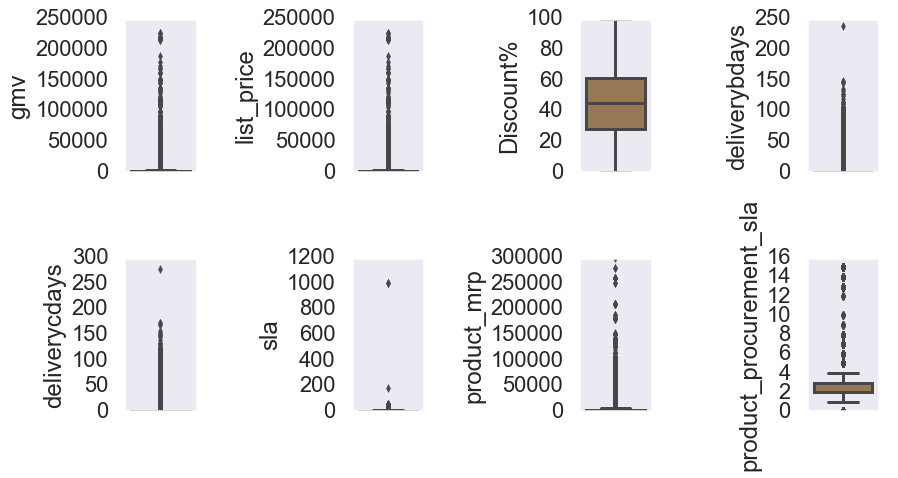

In [73]:
univariate_&_continuos_plot(nummeric_type_vars)

In [74]:
# Outlier treating at different percentiles

ConsumerElectronics_df[nummeric_type_vars].describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
gmv,1464190.0,2483.958105,5622.334895,0.0,349.00,790.00,1999.00,4300.00,11170.00,30499.0,226947.0
list_price,1464190.0,2450.951701,5541.148673,0.0,349.00,775.00,1999.00,4299.00,10990.00,29746.0,226947.0
Discount%,1464190.0,44.547432,22.777238,0.0,27.94,45.05,61.18,74.93,81.32,90.4,100.0
deliverybdays,1464190.0,1.032111,2.477507,0.0,0.00,0.00,0.00,5.00,6.00,8.0,238.0
deliverycdays,1464190.0,1.202033,2.884773,0.0,0.00,0.00,0.00,5.00,7.00,10.0,278.0
sla,1464190.0,5.760836,2.993450,0.0,4.00,6.00,7.00,9.00,10.00,13.0,1006.0
product_mrp,1464190.0,4223.001376,8653.348732,49.0,849.00,1699.00,3499.00,7150.00,17995.00,45990.0,299999.0
product_procurement_sla,1464190.0,2.701303,1.786134,0.0,2.00,2.00,3.00,5.00,5.00,7.0,15.0


In [75]:
ConsumerElectronics_df[['deliverybdays', 'deliverycdays' ,'sla']].quantile([.95, .99])

,deliverybdays,deliverycdays,sla
0.95,6.0,7.0,10.0
0.99,8.0,10.0,13.0


In [76]:
# removing the outlier based on percentiles
ConsumerElectronics_df['deliverybdays'][np.abs(ConsumerElectronics_df['deliverybdays'] > 8.0)]= 8.0
ConsumerElectronics_df['deliverybdays'][np.abs(ConsumerElectronics_df['deliverybdays'] > 10.0)]= 10.0
ConsumerElectronics_df['sla'][np.abs(ConsumerElectronics_df['sla'] > 13.0)]= 13.0

In [77]:
print(round(100*(ConsumerElectronics_df.shape[0] / initial_shape[0])))

89


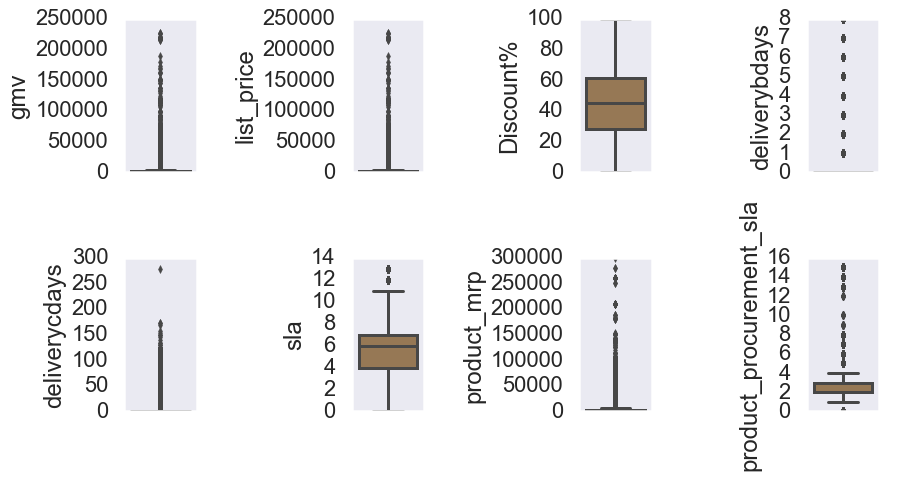

In [78]:
# We still have 89% of the record available
univariate_&_continuos_plot(nummeric_type_vars)

In [79]:
# Weekly calender
import calendar

def year_to_week(year):
        """ will return all the week from selected year """

        import datetime

        WEEK = {'MONDAY':0,'TUESDAY':1,'WEDNESDAY':2,'THURSDAY':3,'FRIDAY':4,'SATURDAY':5,'SUNDAY':6}
        MONTH = {'JANUARY':1,'FEBRUARY':2,'MARCH':3,'APRIL':4,'MAY':5,'JUNE':6,'JULY':7,'AUGUST':8,'SEPTEMBER':9,'OCTOBER':10,'NOVEMBER':11,'DECEMBER':12}

        year = int(year)
        month = MONTH['JANUARY']
        day = WEEK['MONDAY']

        dt = datetime.date(year, month, 1)
        dow_lst = []

        while dt.weekday() != day:
            dt = dt + datetime.timedelta(days = 1)

        lst_month = MONTH.values()

        for mont in lst_month:
         while dt.month == mont:
            dow_lst.append(dt)
            dt = dt + datetime.timedelta(days=7)
            
        month_number_week = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[], 11:[], 12:[]}
        month_name_week = {'Jan':[], 'Feb':[], 'Mar':[], 'Apr':[], 'May':[], 'Jun':[], 'Jul':[], 'Aug':[], 'Sep':[], 'Oct':[], 'Nov':[], 'Dec':[]}

        for each in dow_lst:
            month_number_week[each.month].append(each.isocalendar()[1])
            month_name_week[calendar.month_abbr[each.month]].append(each.isocalendar()[1])

        return month_number_week, month_name_week

In [80]:
dict_number_2015, dict_name_2015 = year_to_week(2015)
print(dict_number_2015)
print()
print(dict_name_2015)
print()
dict_number_2016, dict_name_2016 = year_to_week(2016)
print(dict_number_2016)
print()
print(dict_name_2016)

{1: [2, 3, 4, 5], 2: [6, 7, 8, 9], 3: [10, 11, 12, 13, 14], 4: [15, 16, 17, 18], 5: [19, 20, 21, 22], 6: [23, 24, 25, 26, 27], 7: [28, 29, 30, 31], 8: [32, 33, 34, 35, 36], 9: [37, 38, 39, 40], 10: [41, 42, 43, 44], 11: [45, 46, 47, 48, 49], 12: [50, 51, 52, 53]}

{'Jan': [2, 3, 4, 5], 'Feb': [6, 7, 8, 9], 'Mar': [10, 11, 12, 13, 14], 'Apr': [15, 16, 17, 18], 'May': [19, 20, 21, 22], 'Jun': [23, 24, 25, 26, 27], 'Jul': [28, 29, 30, 31], 'Aug': [32, 33, 34, 35, 36], 'Sep': [37, 38, 39, 40], 'Oct': [41, 42, 43, 44], 'Nov': [45, 46, 47, 48, 49], 'Dec': [50, 51, 52, 53]}

{1: [1, 2, 3, 4], 2: [5, 6, 7, 8, 9], 3: [10, 11, 12, 13], 4: [14, 15, 16, 17], 5: [18, 19, 20, 21, 22], 6: [23, 24, 25, 26], 7: [27, 28, 29, 30], 8: [31, 32, 33, 34, 35], 9: [36, 37, 38, 39], 10: [40, 41, 42, 43, 44], 11: [45, 46, 47, 48], 12: [49, 50, 51, 52]}

{'Jan': [1, 2, 3, 4], 'Feb': [5, 6, 7, 8, 9], 'Mar': [10, 11, 12, 13], 'Apr': [14, 15, 16, 17], 'May': [18, 19, 20, 21, 22], 'Jun': [23, 24, 25, 26], 'Jul': [27,

In [81]:
num_weeks_for_2015 = 0
num_weeks_for_2016 = 0

for i in dict_number_2015:
    if i >= 7:
        num_weeks_for_2015 += len(dict_number_2015[i])

for i in dict_number_2016:
    if i <= 6:
        num_weeks_for_2016 += len(dict_number_2016[i])

total_weeks = num_weeks_for_2015 + num_weeks_for_2016
total_weeks

52

In [82]:
# Media Investment data

Marketing_Media_investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015.0,7.0,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,NaN,NaN
1,2015.0,8.0,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,NaN,NaN
2,2015.0,9.0,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,NaN,NaN
3,2015.0,10.0,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN
4,2015.0,11.0,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,NaN,NaN


In [83]:
#filling null values with zero

Marketing_Media_investment['Radio'].fillna(value=0, inplace=True)
Marketing_Media_investment['Other'].fillna(value=0, inplace=True)

Marketing_Media_investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015.0,7.0,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.0,0.0
1,2015.0,8.0,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,0.0,0.0
2,2015.0,9.0,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,0.0,0.0
3,2015.0,10.0,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,0.0,0.0
4,2015.0,11.0,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,0.0,0.0


In [84]:

temp_Marketing_Media_investment = pd.DataFrame(index=range(total_weeks), columns=['Year', 'Month', 'Week', 'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'])

temp_Marketing_Media_investment.head()

,Year,Month,Week,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# Dividing monthly value with count of week
i = 0

for index, row in Marketing_Media_investment.iterrows():

    if row.Year == 2015:

        num_weeks = len(dict_number_2015[row.Month])

        for week in dict_number_2015[row.Month]:
            
            temp_Marketing_Media_investment.iloc[i].Year = row.Year
            temp_Marketing_Media_investment.iloc[i].Month = row.Month
            temp_Marketing_Media_investment.iloc[i]['Week'] = week
            temp_Marketing_Media_investment.iloc[i]['Total Investment'] = round(row['Total Investment'] / num_weeks, 3)
            temp_Marketing_Media_investment.iloc[i]['TV'] = round(row['TV'] / num_weeks, 3)
            temp_Marketing_Media_investment.iloc[i]['Digital'] = round(row['Digital'] / num_weeks, 3)
            temp_Marketing_Media_investment.iloc[i]['Sponsorship'] = round(row['Sponsorship'] / num_weeks, 3)
            temp_Marketing_Media_investment.iloc[i]['Content Marketing'] = round(row['Content Marketing'] / num_weeks, 3)
            temp_Marketing_Media_investment.iloc[i]['Online marketing'] = round(row['Online marketing'] / num_weeks, 3)
            temp_Marketing_Media_investment.iloc[i]['Affiliates'] = round(row[' Affiliates'] / num_weeks, 3)
            temp_Marketing_Media_investment.iloc[i]['SEM'] = round(row['SEM'] / num_weeks, 3)
            temp_Marketing_Media_investment.iloc[i]['Radio'] = round(row['Radio'] / num_weeks, 3)
            temp_Marketing_Media_investment.iloc[i]['Other'] = round(row['Other'] / num_weeks, 3)
            
            i+=1

    elif row.Year == 2016:
        
        num_weeks = len(dict_number_2016[row.Month])

        for week in dict_number_2016[row.Month]:
            
            temp_Marketing_Media_investment.iloc[i].Year = row.Year
            temp_Marketing_Media_investment.iloc[i].Month = row.Month
            temp_Marketing_Media_investment.iloc[i]['Week'] = week
            temp_Marketing_Media_investment.iloc[i]['Total Investment'] = round(row['Total Investment'] / num_weeks, 3)
            temp_Marketing_Media_investment.iloc[i]['TV'] = round(row['TV'] / num_weeks, 3)
            temp_Marketing_Media_investment.iloc[i]['Digital'] = round(row['Digital'] / num_weeks, 3)
            temp_Marketing_Media_investment.iloc[i]['Sponsorship'] = round(row['Sponsorship'] / num_weeks, 3)
            temp_Marketing_Media_investment.iloc[i]['Content Marketing'] = round(row['Content Marketing'] / num_weeks, 3)
            temp_Marketing_Media_investment.iloc[i]['Online marketing'] = round(row['Online marketing'] / num_weeks, 3)
            temp_Marketing_Media_investment.iloc[i]['Affiliates'] = round(row[' Affiliates'] / num_weeks, 3)
            temp_Marketing_Media_investment.iloc[i]['SEM'] = round(row['SEM'] / num_weeks, 3)
            temp_Marketing_Media_investment.iloc[i]['Radio'] = round(row['Radio'] / num_weeks, 3)
            temp_Marketing_Media_investment.iloc[i]['Other'] = round(row['Other'] / num_weeks, 3)
            
            i+=1

temp_Marketing_Media_investment.head()

,Year,Month,Week,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,28,4.265,0.054,0.633,1.854,0,0.332,0.137,1.256,0,0
1,2015,7,29,4.265,0.054,0.633,1.854,0,0.332,0.137,1.256,0,0
2,2015,7,30,4.265,0.054,0.633,1.854,0,0.332,0.137,1.256,0,0
3,2015,7,31,4.265,0.054,0.633,1.854,0,0.332,0.137,1.256,0,0
4,2015,8,32,1.013,0.001,0.256,0.213,0,0.026,0.015,0.503,0,0


In [86]:
temp_Marketing_Media_investment['Week'] = temp_Marketing_Media_investment['Week'].astype('str')

In [87]:
Marketing_Media_investment = temp_Marketing_Media_investment

Marketing_Media_investment.head()

,Year,Month,Week,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,28,4.265,0.054,0.633,1.854,0,0.332,0.137,1.256,0,0
1,2015,7,29,4.265,0.054,0.633,1.854,0,0.332,0.137,1.256,0,0
2,2015,7,30,4.265,0.054,0.633,1.854,0,0.332,0.137,1.256,0,0
3,2015,7,31,4.265,0.054,0.633,1.854,0,0.332,0.137,1.256,0,0
4,2015,8,32,1.013,0.001,0.256,0.213,0,0.026,0.015,0.503,0,0


In [88]:
# Finding dulicate
Marketing_Media_investment.duplicated('Week').value_counts()

False    52
dtype: int64

In [89]:
# Dropped month and year column

del Marketing_Media_investment['Year']
del Marketing_Media_investment['Month']
Marketing_Media_investment.head()

,Week,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,28,4.265,0.054,0.633,1.854,0,0.332,0.137,1.256,0,0
1,29,4.265,0.054,0.633,1.854,0,0.332,0.137,1.256,0,0
2,30,4.265,0.054,0.633,1.854,0,0.332,0.137,1.256,0,0
3,31,4.265,0.054,0.633,1.854,0,0.332,0.137,1.256,0,0
4,32,1.013,0.001,0.256,0.213,0,0.026,0.015,0.503,0,0


In [90]:
main_initial_cols = Marketing_Media_investment.columns[1:]
main_initial_cols

Index(['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'], dtype='object')

In [91]:
# calculate moving avg for ads channel

def expo_mov_avg_variables(df,var,n):
    for i in var:
        locat_index = df.columns.get_loc(i) + 1
        df.insert(loc=locat_index,column= i+'_EMA_'+np.str(n),value=df[i].ewm(span=n, adjust=False).mean())
    return df

In [92]:
Marketing_Media_investment = expo_mov_avg_variables(Marketing_Media_investment,main_initial_cols,8) 
Marketing_Media_investment.head()

,Week,Total Investment,Total Investment_EMA_8,TV,TV_EMA_8,Digital,Digital_EMA_8,Sponsorship,Sponsorship_EMA_8,Content Marketing,Content Marketing_EMA_8,Online marketing,Online marketing_EMA_8,Affiliates,Affiliates_EMA_8,SEM,SEM_EMA_8,Radio,Radio_EMA_8,Other,Other_EMA_8
0,28,4.265,4.265000,0.054,0.054000,0.633,0.633000,1.854,1.854000,0,0.0,0.332,0.332,0.137,0.137000,1.256,1.256000,0,0.0,0,0.0
1,29,4.265,4.265000,0.054,0.054000,0.633,0.633000,1.854,1.854000,0,0.0,0.332,0.332,0.137,0.137000,1.256,1.256000,0,0.0,0,0.0
2,30,4.265,4.265000,0.054,0.054000,0.633,0.633000,1.854,1.854000,0,0.0,0.332,0.332,0.137,0.137000,1.256,1.256000,0,0.0,0,0.0
3,31,4.265,4.265000,0.054,0.054000,0.633,0.633000,1.854,1.854000,0,0.0,0.332,0.332,0.137,0.137000,1.256,1.256000,0,0.0,0,0.0
4,32,1.013,3.542333,0.001,0.042222,0.256,0.549222,0.213,1.489333,0,0.0,0.026,0.264,0.015,0.109889,0.503,1.088667,0,0.0,0,0.0


In [93]:
#Calculated 5 week and 3 week moving_avg 
def sim_mov_avg(df,var,n):
    for i in var:
        locat_index = df.columns.get_loc(i) + 1
        df.insert(loc=locat_index,column= i+'_SMA_'+np.str(n),value=df[i].rolling(window=n).mean())
    return df

In [94]:
Marketing_Media_investment = sim_mov_avg(Marketing_Media_investment,main_initial_cols,5) 
Marketing_Media_investment.head()

,Week,Total Investment,Total Investment_SMA_5,Total Investment_EMA_8,TV,TV_SMA_5,TV_EMA_8,Digital,Digital_SMA_5,Digital_EMA_8,Sponsorship,Sponsorship_SMA_5,Sponsorship_EMA_8,Content Marketing,Content Marketing_SMA_5,Content Marketing_EMA_8,Online marketing,Online marketing_SMA_5,Online marketing_EMA_8,Affiliates,Affiliates_SMA_5,Affiliates_EMA_8,SEM,SEM_SMA_5,SEM_EMA_8,Radio,Radio_SMA_5,Radio_EMA_8,Other,Other_SMA_5,Other_EMA_8
0,28,4.265,NaN,4.265000,0.054,NaN,0.054000,0.633,NaN,0.633000,1.854,NaN,1.854000,0,NaN,0.0,0.332,NaN,0.332,0.137,NaN,0.137000,1.256,NaN,1.256000,0,NaN,0.0,0,NaN,0.0
1,29,4.265,NaN,4.265000,0.054,NaN,0.054000,0.633,NaN,0.633000,1.854,NaN,1.854000,0,NaN,0.0,0.332,NaN,0.332,0.137,NaN,0.137000,1.256,NaN,1.256000,0,NaN,0.0,0,NaN,0.0
2,30,4.265,NaN,4.265000,0.054,NaN,0.054000,0.633,NaN,0.633000,1.854,NaN,1.854000,0,NaN,0.0,0.332,NaN,0.332,0.137,NaN,0.137000,1.256,NaN,1.256000,0,NaN,0.0,0,NaN,0.0
3,31,4.265,NaN,4.265000,0.054,NaN,0.054000,0.633,NaN,0.633000,1.854,NaN,1.854000,0,NaN,0.0,0.332,NaN,0.332,0.137,NaN,0.137000,1.256,NaN,1.256000,0,NaN,0.0,0,NaN,0.0
4,32,1.013,3.6146,3.542333,0.001,0.0434,0.042222,0.256,0.5576,0.549222,0.213,1.5258,1.489333,0,0.0,0.0,0.026,0.2708,0.264,0.015,0.1126,0.109889,0.503,1.1054,1.088667,0,0.0,0.0,0,0.0,0.0


In [95]:

Marketing_Media_investment = sim_mov_avg(Marketing_Media_investment,main_initial_cols,3) 
Marketing_Media_investment.head()

,Week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8
0,28,4.265,NaN,NaN,4.265000,0.054,NaN,NaN,0.054000,0.633,NaN,NaN,0.633000,1.854,NaN,NaN,1.854000,0,NaN,NaN,0.0,0.332,NaN,NaN,0.332,0.137,NaN,NaN,0.137000,1.256,NaN,NaN,1.256000,0,NaN,NaN,0.0,0,NaN,NaN,0.0
1,29,4.265,NaN,NaN,4.265000,0.054,NaN,NaN,0.054000,0.633,NaN,NaN,0.633000,1.854,NaN,NaN,1.854000,0,NaN,NaN,0.0,0.332,NaN,NaN,0.332,0.137,NaN,NaN,0.137000,1.256,NaN,NaN,1.256000,0,NaN,NaN,0.0,0,NaN,NaN,0.0
2,30,4.265,4.265,NaN,4.265000,0.054,0.054000,NaN,0.054000,0.633,0.633000,NaN,0.633000,1.854,1.854,NaN,1.854000,0,0.0,NaN,0.0,0.332,0.332,NaN,0.332,0.137,0.137000,NaN,0.137000,1.256,1.256,NaN,1.256000,0,0.0,NaN,0.0,0,0.0,NaN,0.0
3,31,4.265,4.265,NaN,4.265000,0.054,0.054000,NaN,0.054000,0.633,0.633000,NaN,0.633000,1.854,1.854,NaN,1.854000,0,0.0,NaN,0.0,0.332,0.332,NaN,0.332,0.137,0.137000,NaN,0.137000,1.256,1.256,NaN,1.256000,0,0.0,NaN,0.0,0,0.0,NaN,0.0
4,32,1.013,3.181,3.6146,3.542333,0.001,0.036333,0.0434,0.042222,0.256,0.507333,0.5576,0.549222,0.213,1.307,1.5258,1.489333,0,0.0,0.0,0.0,0.026,0.230,0.2708,0.264,0.015,0.096333,0.1126,0.109889,0.503,1.005,1.1054,1.088667,0,0.0,0.0,0.0,0,0.0,0.0,0.0


In [203]:
#Calculate value for ad_stock
def ad_stock_calculation(data, engagement_factor):
    
   
    TV_ad_stock_vector = []                     
    Digital_ad_stock_vector = []
    Sponsorship_ad_stock_vector = []
    Content_Marketing_ad_stock_vector = []
    Online_marketing_ad_stock_vector = []
    Affiliates_ad_stock_vector = []
    SEM_ad_stock_vector = []
    Radio_ad_stock_vector = []
    Other_ad_stock_vector = []
    Total_Investment_ad_stock_vector = []
    
 
    tv_ad_stock_value = 0 
    Digital_ad_stock_value = 0
    Sponsorship_ad_stock_value = 0
    Content_Marketing_ad_stock_value = 0
    Online_marketing_ad_stock_value = 0
    Affiliates_ad_stock_value = 0
    SEM_ad_stock_value = 0
    Radio_ad_stock_value = 0
    Other_ad_stock_value = 0
    Total_Investment_ad_stock_value = 0
    
    for index, row in data.iterrows():
        tv_ad_stock_value = row['TV'] + engagement_factor * tv_ad_stock_value
        TV_ad_stock_vector.append(tv_ad_stock_value)
        Digital_ad_stock_value = row['Digital'] + engagement_factor * Digital_ad_stock_value
        Digital_ad_stock_vector.append(Digital_ad_stock_value)
        Sponsorship_ad_stock_value = row['Sponsorship'] + engagement_factor * Sponsorship_ad_stock_value
        Sponsorship_ad_stock_vector.append(Sponsorship_ad_stock_value)
        Content_Marketing_ad_stock_value = row['Content Marketing'] + engagement_factor * Content_Marketing_ad_stock_value
        Content_Marketing_ad_stock_vector.append(Content_Marketing_ad_stock_value)    
        Online_marketing_ad_stock_value = row['Online marketing'] + engagement_factor * Online_marketing_ad_stock_value
        Online_marketing_ad_stock_vector.append(Online_marketing_ad_stock_value)
        Affiliates_ad_stock_value = row['Affiliates'] + engagement_factor * Affiliates_ad_stock_value
        Affiliates_ad_stock_vector.append(Affiliates_ad_stock_value)
        SEM_ad_stock_value = row['SEM'] + engagement_factor * SEM_ad_stock_value
        SEM_ad_stock_vector.append(SEM_ad_stock_value)
        Radio_ad_stock_value = row['Radio'] + engagement_factor * Radio_ad_stock_value
        Radio_ad_stock_vector.append(Radio_ad_stock_value)
        Other_ad_stock_value = row['Other'] + engagement_factor * Other_ad_stock_value
        Other_ad_stock_vector.append(Other_ad_stock_value)
        Total_Investment_ad_stock_value = row['Total Investment'] + engagement_factor * Total_Investment_ad_stock_value
        Total_Investment_ad_stock_vector.append(Total_Investment_ad_stock_value)
    
    locat_index = data.columns.get_loc('TV_EMA_8') + 1
    data.insert(loc=locat_index,column='TV_Ad_Stock',value=TV_ad_stock_vector)
    locat_index = data.columns.get_loc('Digital_EMA_8') + 1
    data.insert(loc=locat_index,column='Digital_Ad_Stock',value=Digital_ad_stock_vector)
    locat_index = data.columns.get_loc('Sponsorship_EMA_8') + 1
    data.insert(loc=locat_index,column='Sponsorship_Ad_Stock',value=Sponsorship_ad_stock_vector)
    locat_index = data.columns.get_loc('Content Marketing_EMA_8') + 1
    data.insert(loc=locat_index,column='Content_Marketing_Ad_Stock',value=Content_Marketing_ad_stock_vector)
    locat_index = data.columns.get_loc('Online marketing_EMA_8') + 1
    data.insert(loc=locat_index,column='Online_marketing_Ad_Stock',value=Online_marketing_ad_stock_vector)
    locat_index = data.columns.get_loc('Affiliates_EMA_8') + 1
    data.insert(loc=locat_index,column='Affiliates_Ad_Stock',value=Affiliates_ad_stock_vector)
    locat_index = data.columns.get_loc('SEM_EMA_8') + 1
    data.insert(loc=locat_index,column='SEM_Ad_Stock',value=SEM_ad_stock_vector)
    locat_index = data.columns.get_loc('Radio_EMA_8') + 1
    data.insert(loc=locat_index,column='Radio_Ad_Stock',value=Radio_ad_stock_vector)
    locat_index = data.columns.get_loc('Other_EMA_8') + 1
    data.insert(loc=locat_index,column='Other_Ad_Stock',value=Other_ad_stock_vector)
    locat_index = data.columns.get_loc('Total Investment_EMA_8') + 1
    data.insert(loc=locat_index,column='Total_Investment_Ad_Stock',value=Total_Investment_ad_stock_vector)
    
    return data


In [97]:
Marketing_Media_investment = ad_stock_calculation(data=Marketing_Media_investment, engagement_factor=0.6)
Marketing_Media_investment.head(10)

,Week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,Total_Investment_Ad_Stock,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,TV_Ad_Stock,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Digital_Ad_Stock,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Sponsorship_Ad_Stock,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Content_Marketing_Ad_Stock,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Online_marketing_Ad_Stock,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,Affiliates_Ad_Stock,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,SEM_Ad_Stock,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Radio_Ad_Stock,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8,Other_Ad_Stock
0,28,4.265,NaN,NaN,4.265000,4.265000,0.054,NaN,NaN,0.054000,0.054000,0.633,NaN,NaN,0.633000,0.633000,1.854,NaN,NaN,1.854000,1.854000,0,NaN,NaN,0.000,0.000,0.332,NaN,NaN,0.332000,0.332000,0.137,NaN,NaN,0.137000,0.137000,1.256,NaN,NaN,1.256000,1.256000,0,NaN,NaN,0.0,0.0,0,NaN,NaN,0.0,0.0
1,29,4.265,NaN,NaN,4.265000,6.824000,0.054,NaN,NaN,0.054000,0.086400,0.633,NaN,NaN,0.633000,1.012800,1.854,NaN,NaN,1.854000,2.966400,0,NaN,NaN,0.000,0.000,0.332,NaN,NaN,0.332000,0.531200,0.137,NaN,NaN,0.137000,0.219200,1.256,NaN,NaN,1.256000,2.009600,0,NaN,NaN,0.0,0.0,0,NaN,NaN,0.0,0.0
2,30,4.265,4.265000,NaN,4.265000,8.359400,0.054,0.054000,NaN,0.054000,0.105840,0.633,0.633000,NaN,0.633000,1.240680,1.854,1.854000,NaN,1.854000,3.633840,0,0.000,NaN,0.000,0.000,0.332,0.332000,NaN,0.332000,0.650720,0.137,0.137000,NaN,0.137000,0.268520,1.256,1.256000,NaN,1.256000,2.461760,0,0.0,NaN,0.0,0.0,0,0.0,NaN,0.0,0.0
3,31,4.265,4.265000,NaN,4.265000,9.280640,0.054,0.054000,NaN,0.054000,0.117504,0.633,0.633000,NaN,0.633000,1.377408,1.854,1.854000,NaN,1.854000,4.034304,0,0.000,NaN,0.000,0.000,0.332,0.332000,NaN,0.332000,0.722432,0.137,0.137000,NaN,0.137000,0.298112,1.256,1.256000,NaN,1.256000,2.733056,0,0.0,NaN,0.0,0.0,0,0.0,NaN,0.0,0.0
4,32,1.013,3.181000,3.6146,3.542333,6.581384,0.001,0.036333,0.0434,0.042222,0.071502,0.256,0.507333,0.5576,0.549222,1.082445,0.213,1.307000,1.5258,1.489333,2.633582,0,0.000,0.0000,0.000,0.000,0.026,0.230000,0.2708,0.264000,0.459459,0.015,0.096333,0.1126,0.109889,0.193867,0.503,1.005000,1.1054,1.088667,2.142834,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
5,33,1.013,2.097000,2.9642,2.980259,4.961830,0.001,0.018667,0.0328,0.033062,0.043901,0.256,0.381667,0.4822,0.484062,0.905467,0.213,0.760000,1.1976,1.205704,1.793149,0,0.000,0.0000,0.000,0.000,0.026,0.128000,0.2096,0.211111,0.301676,0.015,0.055667,0.0882,0.088802,0.131320,0.503,0.754000,0.9548,0.958519,1.788700,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
6,34,1.013,1.013000,2.3138,2.543091,3.990098,0.001,0.001000,0.0222,0.025937,0.027341,0.256,0.256000,0.4068,0.433381,0.799280,0.213,0.213000,0.8694,0.985103,1.288890,0,0.000,0.0000,0.000,0.000,0.026,0.026000,0.1484,0.169975,0.207005,0.015,0.015000,0.0638,0.072402,0.093792,0.503,0.503000,0.8042,0.857292,1.576220,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
7,35,1.013,1.013000,1.6634,2.203070,3.407059,0.001,0.001000,0.0116,0.020395,0.017405,0.256,0.256000,0.3314,0.393963,0.735568,0.213,0.213000,0.5412,0.813524,0.986334,0,0.000,0.0000,0.000,0.000,0.026,0.026000,0.0872,0.137981,0.150203,0.015,0.015000,0.0394,0.059646,0.071275,0.503,0.503000,0.6536,0.778561,1.448732,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
8,36,1.013,1.013000,1.0130,1.938610,3.057235,0.001,0.001000,0.0010,0.016085,0.011443,0.256,0.256000,0.2560,0.363305,0.697341,0.213,0.213000,0.2130,0.680075,0.804800,0,0.000,0.0000,0.000,0.000,0.026,0.026000,0.0260,0.113096,0.116122,0.015,0.015000,0.0150,0.049725,0.057765,0.503,0.503000,0.5030,0.717325,1.372239,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
9,37,24.064,8.696667,5.6232,6.855364,25.898341,0.97,0.324000,0.1948,0.228066,0.976866,0.339,0.283667,0.2726,0.357904,0.757405,15.697,5.374333,3.3098,4.017169,16.179880,0.153,0.051,0.0306,0.034,0.153,4.095,1.382333,0.8398,0.997964,4.164673,1.26,0.430000

In [98]:
Marketing_Media_investment.fillna(value=0, inplace=True)
Marketing_Media_investment.head(10)

,Week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,Total_Investment_Ad_Stock,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,TV_Ad_Stock,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Digital_Ad_Stock,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Sponsorship_Ad_Stock,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Content_Marketing_Ad_Stock,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Online_marketing_Ad_Stock,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,Affiliates_Ad_Stock,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,SEM_Ad_Stock,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Radio_Ad_Stock,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8,Other_Ad_Stock
0,28,4.265,0.000000,0.0000,4.265000,4.265000,0.054,0.000000,0.0000,0.054000,0.054000,0.633,0.000000,0.0000,0.633000,0.633000,1.854,0.000000,0.0000,1.854000,1.854000,0.000,0.000,0.0000,0.000,0.000,0.332,0.000000,0.0000,0.332000,0.332000,0.137,0.000000,0.0000,0.137000,0.137000,1.256,0.000000,0.0000,1.256000,1.256000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,4.265,0.000000,0.0000,4.265000,6.824000,0.054,0.000000,0.0000,0.054000,0.086400,0.633,0.000000,0.0000,0.633000,1.012800,1.854,0.000000,0.0000,1.854000,2.966400,0.000,0.000,0.0000,0.000,0.000,0.332,0.000000,0.0000,0.332000,0.531200,0.137,0.000000,0.0000,0.137000,0.219200,1.256,0.000000,0.0000,1.256000,2.009600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30,4.265,4.265000,0.0000,4.265000,8.359400,0.054,0.054000,0.0000,0.054000,0.105840,0.633,0.633000,0.0000,0.633000,1.240680,1.854,1.854000,0.0000,1.854000,3.633840,0.000,0.000,0.0000,0.000,0.000,0.332,0.332000,0.0000,0.332000,0.650720,0.137,0.137000,0.0000,0.137000,0.268520,1.256,1.256000,0.0000,1.256000,2.461760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31,4.265,4.265000,0.0000,4.265000,9.280640,0.054,0.054000,0.0000,0.054000,0.117504,0.633,0.633000,0.0000,0.633000,1.377408,1.854,1.854000,0.0000,1.854000,4.034304,0.000,0.000,0.0000,0.000,0.000,0.332,0.332000,0.0000,0.332000,0.722432,0.137,0.137000,0.0000,0.137000,0.298112,1.256,1.256000,0.0000,1.256000,2.733056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,1.013,3.181000,3.6146,3.542333,6.581384,0.001,0.036333,0.0434,0.042222,0.071502,0.256,0.507333,0.5576,0.549222,1.082445,0.213,1.307000,1.5258,1.489333,2.633582,0.000,0.000,0.0000,0.000,0.000,0.026,0.230000,0.2708,0.264000,0.459459,0.015,0.096333,0.1126,0.109889,0.193867,0.503,1.005000,1.1054,1.088667,2.142834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,33,1.013,2.097000,2.9642,2.980259,4.961830,0.001,0.018667,0.0328,0.033062,0.043901,0.256,0.381667,0.4822,0.484062,0.905467,0.213,0.760000,1.1976,1.205704,1.793149,0.000,0.000,0.0000,0.000,0.000,0.026,0.128000,0.2096,0.211111,0.301676,0.015,0.055667,0.0882,0.088802,0.131320,0.503,0.754000,0.9548,0.958519,1.788700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,34,1.013,1.013000,2.3138,2.543091,3.990098,0.001,0.001000,0.0222,0.025937,0.027341,0.256,0.256000,0.4068,0.433381,0.799280,0.213,0.213000,0.8694,0.985103,1.288890,0.000,0.000,0.0000,0.000,0.000,0.026,0.026000,0.1484,0.169975,0.207005,0.015,0.015000,0.0638,0.072402,0.093792,0.503,0.503000,0.8042,0.857292,1.576220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,35,1.013,1.013000,1.6634,2.203070,3.407059,0.001,0.001000,0.0116,0.020395,0.017405,0.256,0.256000,0.3314,0.393963,0.735568,0.213,0.213000,0.5412,0.813524,0.986334,0.000,0.000,0.0000,0.000,0.000,0.026,0.026000,0.0872,0.137981,0.150203,0.015,0.015000,0.0394,0.059646,0.071275,0.503,0.503000,0.6536,0.778561,1.448732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,36,1.013,1.013000,1.0130,1.938610,3.057235,0.001,0.001000,0.0010,0.016085,0.011443,0.256,0.256000,0.2560,0.363305,0.697341,0.213,0.213000,0.2130,0.680075,0.804800,0.000,0.000,0.0000,0.000,0.000,0.026,0.026000,0.0260,0.113096,0.116122,0.015,0.015000,0.0150,0.049725,0.057765,0.503,0.503000,0.5030,0.717325,1.372239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,37,24.06

In [99]:
Marketing_Media_investment.shape

(52, 51)

In [100]:
# NPS data
net_promoter_score

,score,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
0,NPS,54.599588,59.987101,46.925419,44.398389,47.0,45.8,47.093031,50.327406,49.02055,51.827605,47.306951,50.516687
1,Stock Index,1177.000000,1206.000000,1101.000000,1210.000000,1233.0,1038.0,1052.000000,1222.000000,1015.00000,1242.000000,1228.000000,1194.000000


In [101]:
# Performing manipulation to get the right data

net_promoter_score.reset_index(drop=True, inplace=True)
net_promoter_score = net_promoter_score.T
net_promoter_score.reset_index(drop=False, inplace=True)
net_promoter_score.columns = ['Month', 'NPS', 'Stock Index']
net_promoter_score.drop(net_promoter_score.index[0], inplace=True)
net_promoter_score

,Month,NPS,Stock Index
1,July'15,54.5996,1177
2,Aug'15,59.9871,1206
3,Sept'15,46.9254,1101
4,Oct'15,44.3984,1210
5,Nov'15,47,1233
6,Dec'15,45.8,1038
7,Jan'16,47.093,1052
8,Feb'16,50.3274,1222
9,Mar'16,49.0206,1015
10,Apr'16,51.8276,1242


In [102]:

temp_net_promoter_score = pd.DataFrame(index=range(total_weeks), columns=['Year', 'Month', 'Week', 'NPS', 'Stock Index'])

temp_net_promoter_score.head()

,Year,Month,Week,NPS,Stock Index
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [103]:
# Using same NPS and stock index value for each month
i = 0

for index, row in net_promoter_score.iterrows():

    if '15' in row['Month']:
        
        month = re.split("[']", row['Month'])[0][0:3]
    
        for week in dict_name_2015[month]:        
            
            temp_net_promoter_score.iloc[i].Year = 2015
            temp_net_promoter_score.iloc[i].Month = month
            temp_net_promoter_score.iloc[i].Week = week
            temp_net_promoter_score.iloc[i].NPS = row['NPS']
            temp_net_promoter_score.iloc[i]['Stock Index'] = row['Stock Index']
            
            i+=1
        
    elif '16' in row['Month']:

        month = re.split("[']", row['Month'])[0][0:3]
    
        for week in dict_name_2016[month]:        
            
            temp_net_promoter_score.iloc[i].Year = 2016
            temp_net_promoter_score.iloc[i].Month = month
            temp_net_promoter_score.iloc[i].Week = week
            temp_net_promoter_score.iloc[i].NPS = row['NPS']
            temp_net_promoter_score.iloc[i]['Stock Index'] = row['Stock Index']
            
            i+=1

temp_net_promoter_score.head()

,Year,Month,Week,NPS,Stock Index
0,2015,Jul,28,54.5996,1177
1,2015,Jul,29,54.5996,1177
2,2015,Jul,30,54.5996,1177
3,2015,Jul,31,54.5996,1177
4,2015,Aug,32,59.9871,1206


In [104]:
temp_net_promoter_score['Week'] = temp_net_promoter_score['Week'].astype('str')

In [105]:
net_promoter_score = temp_net_promoter_score

net_promoter_score.head()

,Year,Month,Week,NPS,Stock Index
0,2015,Jul,28,54.5996,1177
1,2015,Jul,29,54.5996,1177
2,2015,Jul,30,54.5996,1177
3,2015,Jul,31,54.5996,1177
4,2015,Aug,32,59.9871,1206


In [106]:
net_promoter_score.duplicated('Week').value_counts()

False    52
dtype: int64

In [107]:
# Dropped year and month column

del net_promoter_score['Year']
del net_promoter_score['Month']

In [108]:
nps_main_initial_cols = net_promoter_score.columns[1:]
nps_main_initial_cols

Index(['NPS', 'Stock Index'], dtype='object')

In [109]:
# Calculated 3 and 5 week Simple Moving Average for NPS and Stock_Index
net_promoter_score = sim_mov_avg(net_promoter_score,nps_main_initial_cols,5) 
net_promoter_score = sim_mov_avg(net_promoter_score,nps_main_initial_cols,3) 
net_promoter_score.fillna(value=0, inplace=True)
net_promoter_score.head()

,Week,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5
0,28,54.599588,0.000000,0.000000,1177.0,0.000000,0.0
1,29,54.599588,0.000000,0.000000,1177.0,0.000000,0.0
2,30,54.599588,54.599588,0.000000,1177.0,1177.000000,0.0
3,31,54.599588,54.599588,0.000000,1177.0,1177.000000,0.0
4,32,59.987101,56.395426,55.677091,1206.0,1186.666667,1182.8


In [110]:
# Sale_Calender data
sale_calendar_Days.head()

,Unnamed: 1,Sales Calendar
0,2015.0,(18-19th July)
1,2015.0,(15-17th Aug)
2,2015.0,(28-30th Aug)
3,2015.0,(17-15th Oct)
4,2015.0,(7-14th Nov)


In [111]:
# Performing manipulation to get the right data
sale_calendar_Days.columns = ['Year', 'Sale']

sale_calendar_Days.Year = sale_calendar_Days.Year.apply(lambda x: int(x))
sale_calendar_Days.Sale = sale_calendar_Days.Sale.apply(lambda x: x.replace('th','').strip())
sale_calendar_Days.Sale = sale_calendar_Days.Sale.apply(lambda x: x.replace('rd','').strip())
sale_calendar_Days.Sale = sale_calendar_Days.Sale.apply(lambda x: x.replace('(','').strip())
sale_calendar_Days.Sale = sale_calendar_Days.Sale.apply(lambda x: x.replace(')','').strip())


sale_calendar_Days.iloc[5, sale_calendar_Days.columns.get_loc('Sale')] = '25-31 Dec'
sale_calendar_Days = sale_calendar_Days.append({'Year' : 2016 , 'Sale' : '1-3 Jan'} , ignore_index=True)

sale_calendar_Days.sort_values(by=['Year'], ascending = True, inplace = True)

sale_calendar_Days.head()

,Year,Sale
0,2015,18-19 July
1,2015,15-17 Aug
2,2015,28-30 Aug
3,2015,17-15 Oct
4,2015,7-14 Nov


In [112]:
# Dropping the entry which are not required

sale_calendar_Days.drop(sale_calendar_Days.index[3], inplace=True)

sale_calendar_Days.head()

,Year,Sale
0,2015,18-19 July
1,2015,15-17 Aug
2,2015,28-30 Aug
4,2015,7-14 Nov
5,2015,25-31 Dec


In [113]:
temp_sale_calendar_Days = pd.DataFrame(index=range(total_weeks), columns=['Year', 'Month', 'Week', 'Sale'])

temp_sale_calendar_Days.head()

,Year,Month,Week,Sale
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [114]:
# Finding number of days of week where there was sale recorded

i = 0
import datetime

for index, row in sale_calendar_Days.iterrows():

    week_list = []
    month_list = []
    year_list = []

    date1, date2, month = re.split("[- ]", row.Sale)
    month = month[0:3] 
    year = row.Year
    
    date = int(date1)
    
    while date <= int(date2):
        
        week = datetime.datetime.strptime('{}-{}-{}'.format(date, month, year), "%d-%b-%Y").strftime("%V")
        week_list.append(int(week))
        date+=1
    
    week_dict = dict.fromkeys(week_list, 0) 

    for j in week_list:
        week_dict[j] = week_dict[j] + 1

    for key, value in week_dict.items():
        temp_sale_calendar_Days.iloc[i].Year = year
        temp_sale_calendar_Days.iloc[i].Month = month
        temp_sale_calendar_Days.iloc[i].Week = key
        temp_sale_calendar_Days.iloc[i].Sale = value
        
        i+=1
    
temp_sale_calendar_Days.dropna(axis=0, how='all', inplace=True) 
temp_sale_calendar_Days.sort_values(by=['Week'], ascending = True, inplace = True)

temp_sale_calendar_Days.loc[temp_sale_calendar_Days['Week'] == 53, 'Sale'] = temp_sale_calendar_Days.loc[temp_sale_calendar_Days['Week'] == 53, 'Sale'].sum()
temp_sale_calendar_Days.loc[temp_sale_calendar_Days['Week'] == 7, 'Sale'] = temp_sale_calendar_Days.loc[temp_sale_calendar_Days['Week'] == 7, 'Sale'].sum()

temp_sale_calendar_Days.drop_duplicates(subset=['Week'], keep='first', inplace=True)
temp_sale_calendar_Days.reset_index(drop=True, inplace=True)

temp_sale_calendar_Days.head()

,Year,Month,Week,Sale
0,2016,Jan,3,3
1,2016,Feb,5,2
2,2016,Feb,6,1
3,2016,Feb,7,3
4,2016,Mar,10,3


In [115]:
temp_sale_calendar_Days['Week'] = temp_sale_calendar_Days['Week'].astype('str')
sale_calendar_Days = temp_sale_calendar_Days

sale_calendar_Days.head()

,Year,Month,Week,Sale
0,2016,Jan,3,3
1,2016,Feb,5,2
2,2016,Feb,6,1
3,2016,Feb,7,3
4,2016,Mar,10,3


In [116]:
# Dropping un-necessary columns
del sale_calendar_Days['Year']
del sale_calendar_Days['Month']

In [117]:
# Generating weekly data for climate 2015 and 2016

climate_year_2015 = pd.read_csv('ONTARIO-2015.csv', skiprows=24)

climate_year_2015.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2015-01-01,2015,1,1,†,0.0,NaN,-8.5,NaN,-4.3,NaN,22.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,2015,1,2,†,3.0,NaN,-3.0,NaN,0.0,NaN,18.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,2015,1,3,†,2.5,NaN,-4.0,NaN,-0.8,NaN,18.8,NaN,0.0,NaN,24.0,NaN,0.0,NaN,24.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2015-01-04,2015,1,4,†,2.5,NaN,0.0,NaN,1.3,NaN,16.7,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,2015-01-05,2015,1,5,†,-10.0,NaN,-13.5,NaN,-11.8,NaN,29.8,NaN,0.0,NaN,0.0,NaN,3.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [118]:
# Droped the columns with null_values

climate_year_2015.dropna(axis=1, thresh=1, inplace=True)

climate_year_2015.reset_index(drop=True, inplace=True)

climate_year_2015.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag
0,2015-01-01,2015,1,1,†,0.0,NaN,-8.5,NaN,-4.3,NaN,22.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
1,2015-01-02,2015,1,2,†,3.0,NaN,-3.0,NaN,0.0,NaN,18.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2,2015-01-03,2015,1,3,†,2.5,NaN,-4.0,NaN,-0.8,NaN,18.8,NaN,0.0,NaN,24.0,NaN,0.0,NaN,24.0,NaN,0.0,NaN
3,2015-01-04,2015,1,4,†,2.5,NaN,0.0,NaN,1.3,NaN,16.7,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.0,NaN,0.0,NaN
4,2015-01-05,2015,1,5,†,-10.0,NaN,-13.5,NaN,-11.8,NaN,29.8,NaN,0.0,NaN,0.0,NaN,3.0,NaN,3.0,NaN,1.0,NaN


In [119]:
# Droppping columns with 1 unique value

drop_cols = []

for col in climate_year_2015.columns:
    if 'Flag' in col:
        print(climate_year_2015[col].value_counts())
        print()
        drop_cols.append(col)

drop_cols.append('Data Quality')

climate_year_2015.drop(drop_cols, axis=1, inplace=True)

print(climate_year_2015.columns)

M    13
Name: Max Temp Flag, dtype: int64

M    39
Name: Min Temp Flag, dtype: int64

M    39
Name: Mean Temp Flag, dtype: int64

M    39
Name: Heat Deg Days Flag, dtype: int64

M    39
Name: Cool Deg Days Flag, dtype: int64

T    7
Name: Total Rain Flag, dtype: int64

T    9
Name: Total Snow Flag, dtype: int64

T    12
Name: Total Precip Flag, dtype: int64

T    2
Name: Snow on Grnd Flag, dtype: int64

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'], dtype='object')


In [120]:
# Resetting names of columns

climate_year_2015.columns = [col.replace(' (°C)','').strip() for col in climate_year_2015.columns]

climate_year_2015.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp', 'Min Temp', 'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'], dtype='object')

In [121]:
# Dropped rows having null values

cols = ['Max Temp',
 'Min Temp',
 'Mean Temp',
 'Heat Deg Days',
 'Cool Deg Days',
 'Total Rain (mm)',
 'Total Snow (cm)',
 'Total Precip (mm)',
 'Snow on Grnd (cm)']

climate_year_2015.dropna(subset=cols, inplace=True)

climate_year_2015.reset_index(drop=True, inplace=True)

climate_year_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 13 columns):
Date/Time            190 non-null object
Year                 190 non-null int64
Month                190 non-null int64
Day                  190 non-null int64
Max Temp             190 non-null float64
Min Temp             190 non-null float64
Mean Temp            190 non-null float64
Heat Deg Days        190 non-null float64
Cool Deg Days        190 non-null float64
Total Rain (mm)      190 non-null float64
Total Snow (cm)      190 non-null float64
Total Precip (mm)    190 non-null float64
Snow on Grnd (cm)    190 non-null float64
dtypes: float64(9), int64(3), object(1)
memory usage: 19.4+ KB


In [122]:
# Pulling week number from the data

climate_year_2015['Week'] = climate_year_2015['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%V"))

climate_year_2015['Week'] = climate_year_2015['Week'].apply(lambda x: str(x).lstrip('0'))

climate_year_2015.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Week
0,2015-01-01,2015,1,1,0.0,-8.5,-4.3,22.3,0.0,0.0,0.0,0.0,0.0,1
1,2015-01-02,2015,1,2,3.0,-3.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,1
2,2015-01-03,2015,1,3,2.5,-4.0,-0.8,18.8,0.0,24.0,0.0,24.0,0.0,1
3,2015-01-04,2015,1,4,2.5,0.0,1.3,16.7,0.0,0.0,1.0,1.0,0.0,1
4,2015-01-05,2015,1,5,-10.0,-13.5,-11.8,29.8,0.0,0.0,3.0,3.0,1.0,2


In [123]:
# Pulling the required data

climate_year_2015 = climate_year_2015[climate_year_2015['Month'] >= 7]
climate_year_2015.reset_index(drop=True, inplace=True)

climate_year_2015.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Week
0,2015-07-01,2015,7,1,24.5,17.0,20.8,0.0,2.8,0.0,0.0,0.0,0.0,27
1,2015-07-02,2015,7,2,24.0,14.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,27
2,2015-07-03,2015,7,3,25.0,10.0,17.5,0.5,0.0,0.0,0.0,0.0,0.0,27
3,2015-07-04,2015,7,4,26.0,11.0,18.5,0.0,0.5,0.0,0.0,0.0,0.0,27
4,2015-07-05,2015,7,5,28.0,14.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0,27


In [124]:
climate_year_2015.sort_values(by=['Week'], ascending = True, inplace = True)

In [125]:

# aggregating the weekly info

climate_year_2015 = climate_year_2015.groupby(['Week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)

climate_year_2015.head()

,Week,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,27,28.0,10.0,19.360000,0.100000,1.460000,0.000000,0.0,0.000000,0.0
1,28,28.0,12.5,20.100000,0.283333,2.383333,4.416667,0.0,4.416667,0.0
2,29,33.0,11.0,23.183333,0.000000,5.183333,1.400000,0.0,1.400000,0.0
3,30,31.5,14.5,23.060000,0.000000,5.060000,1.080000,0.0,1.080000,0.0
4,31,33.5,16.0,24.566667,0.000000,6.566667,4.633333,0.0,4.633333,0.0


In [126]:
# Dropping other weeks which are out of scope in analysis

climate_year_2015.drop(climate_year_2015[climate_year_2015['Week'] == '27'].index, inplace = True)

In [127]:
# Similar operation for climate 2016 data
climate_year_2016 = pd.read_csv('ONTARIO-2016.csv', skiprows=24)

climate_year_2016.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2016-01-01,2016,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,2016,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,2016,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,2016,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,2016,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:

climate_year_2016.dropna(axis=1, thresh=1, inplace=True)

climate_year_2016.reset_index(drop=True, inplace=True)

climate_year_2016.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag
0,2016-01-01,2016,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,2016,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,2016,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,2016,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,2016,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
# Dropping with 1 unique value
drop_cols = []

for col in climate_year_2016.columns:
    if 'Flag' in col:
        print(climate_year_2016[col].value_counts())
        print()
        drop_cols.append(col)

drop_cols.append('Data Quality')

climate_year_2016.drop(drop_cols, axis=1, inplace=True)

print(climate_year_2016.columns)

M    1
Name: Max Temp Flag, dtype: int64

M    8
Name: Min Temp Flag, dtype: int64

M    8
Name: Mean Temp Flag, dtype: int64

M    8
Name: Heat Deg Days Flag, dtype: int64

M    8
Name: Cool Deg Days Flag, dtype: int64

T    3
Name: Total Rain Flag, dtype: int64

T    7
Name: Total Snow Flag, dtype: int64

T    7
Name: Total Precip Flag, dtype: int64

T    6
Name: Snow on Grnd Flag, dtype: int64

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'], dtype='object')


In [130]:
# Resetting the names of columns

climate_year_2016.columns = [col.replace(' (°C)','').strip() for col in climate_year_2016.columns]

climate_year_2016.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp', 'Min Temp', 'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'], dtype='object')

In [131]:
# dropped the null values

cols = ['Max Temp',
 'Min Temp',
 'Mean Temp',
 'Heat Deg Days',
 'Cool Deg Days',
 'Total Rain (mm)',
 'Total Snow (cm)',
 'Total Precip (mm)',
 'Snow on Grnd (cm)']

climate_year_2016.dropna(subset=cols, inplace=True)

climate_year_2016.reset_index(drop=True, inplace=True)

climate_year_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 13 columns):
Date/Time            219 non-null object
Year                 219 non-null int64
Month                219 non-null int64
Day                  219 non-null int64
Max Temp             219 non-null float64
Min Temp             219 non-null float64
Mean Temp            219 non-null float64
Heat Deg Days        219 non-null float64
Cool Deg Days        219 non-null float64
Total Rain (mm)      219 non-null float64
Total Snow (cm)      219 non-null float64
Total Precip (mm)    219 non-null float64
Snow on Grnd (cm)    219 non-null float64
dtypes: float64(9), int64(3), object(1)
memory usage: 22.3+ KB


In [132]:

climate_year_2016['Week'] = climate_year_2016['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%V"))

climate_year_2016['Week'] = climate_year_2016['Week'].apply(lambda x: str(x).lstrip('0'))

climate_year_2016.head()


,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Week
0,2016-01-08,2016,1,8,7.0,-14.0,-3.5,21.5,0.0,9.0,0.0,9.0,0.0,1
1,2016-01-09,2016,1,9,11.0,3.0,7.0,11.0,0.0,14.6,0.0,14.6,0.0,1
2,2016-01-10,2016,1,10,-1.5,-5.0,-3.3,21.3,0.0,0.0,7.0,7.0,0.0,1
3,2016-01-12,2016,1,12,-5.0,-12.0,-8.5,26.5,0.0,0.0,0.0,0.0,12.0,2
4,2016-01-14,2016,1,14,2.5,-10.5,-4.0,22.0,0.0,0.0,0.0,0.0,11.0,2


In [133]:

climate_year_2016 = climate_year_2016[climate_year_2016['Month'] <= 6]
climate_year_2016.reset_index(drop=True, inplace=True)

climate_year_2016.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Week
0,2016-01-08,2016,1,8,7.0,-14.0,-3.5,21.5,0.0,9.0,0.0,9.0,0.0,1
1,2016-01-09,2016,1,9,11.0,3.0,7.0,11.0,0.0,14.6,0.0,14.6,0.0,1
2,2016-01-10,2016,1,10,-1.5,-5.0,-3.3,21.3,0.0,0.0,7.0,7.0,0.0,1
3,2016-01-12,2016,1,12,-5.0,-12.0,-8.5,26.5,0.0,0.0,0.0,0.0,12.0,2
4,2016-01-14,2016,1,14,2.5,-10.5,-4.0,22.0,0.0,0.0,0.0,0.0,11.0,2


In [134]:
climate_year_2016.sort_values(by=['Week'], ascending = True, inplace = True)

In [135]:
# pulling the aggregated weekly data

climate_year_2016 = climate_year_2016.groupby(['Week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)

climate_year_2016.head()

,Week,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,1,11.0,-14.0,0.066667,17.933333,0.0,7.866667,2.333333,10.200000,0.0
1,10,20.0,-2.0,10.166667,7.833333,0.0,9.000000,0.000000,9.000000,0.0
2,11,16.0,-2.5,8.900000,9.100000,0.0,0.500000,0.000000,0.500000,0.0
3,12,20.5,-3.5,5.720000,12.280000,0.0,12.800000,0.000000,12.800000,0.0
4,13,16.0,-5.0,6.871429,11.128571,0.0,2.828571,0.542857,3.371429,0.0


In [136]:
# Creating a function to find difference in List
def list_difference(list1, list2): 
    return (list(set(list1) - set(list2)))

In [137]:
print(list_difference(list(climate_year_2015.columns), list(climate_year_2016.columns)))

[]


In [138]:
print(climate_year_2015.shape)
print(climate_year_2016.shape)

(26, 10)
(25, 10)


In [139]:
climate = pd.concat([climate_year_2015,climate_year_2016],axis = 0)
climate.shape

(51, 10)

In [140]:
climate.head()

,Week,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
1,28,28.0,12.5,20.100000,0.283333,2.383333,4.416667,0.0,4.416667,0.0
2,29,33.0,11.0,23.183333,0.000000,5.183333,1.400000,0.0,1.400000,0.0
3,30,31.5,14.5,23.060000,0.000000,5.060000,1.080000,0.0,1.080000,0.0
4,31,33.5,16.0,24.566667,0.000000,6.566667,4.633333,0.0,4.633333,0.0
5,32,28.5,15.0,21.650000,0.000000,3.650000,0.350000,0.0,0.350000,0.0


In [141]:
# Separating the data for all sub products
ConsumerElectronics_df['product_analytic_sub_category'].value_counts()

speaker                468310
cameraaccessory        215901
gamingaccessory        185876
tvvideosmall           133192
homeaudio              111061
audiomp3player         103463
game                    96842
camera                  87552
gamingconsole           26984
camerastorage           16558
audioaccessory          10702
hometheatre              4197
amplifierreceiver        3455
gamemembershipcards        97
Name: product_analytic_sub_category, dtype: int64

In [204]:
camera_accessory_df1 = ConsumerElectronics_df.loc[ConsumerElectronics_df['product_analytic_sub_category']=='cameraaccessory']
gaming_accessory_df1 = ConsumerElectronics_df.loc[ConsumerElectronics_df['product_analytic_sub_category']=='gamingaccessory']
home_audio_df1 = ConsumerElectronics_df.loc[ConsumerElectronics_df['product_analytic_sub_category']=='homeaudio']


In [143]:
camera_accessory_df1['is_cod'] = camera_accessory_df1['s1_fact.order_payment_type'].apply(lambda x:1 if x=='cod' else 0)
gaming_accessory_df1['is_cod'] = gaming_accessory_df1['s1_fact.order_payment_type'].apply(lambda x:1 if x=='cod' else 0)
home_audio_df1['is_cod'] = home_audio_df1['s1_fact.order_payment_type'].apply(lambda x:1 if x=='cod' else 0)


camera_accessory_df1['is_mass_market'] = camera_accessory_df1['product_type'].apply(lambda x:1 if x=='mass_market' else 0)
gaming_accessory_df1['is_mass_market'] = gaming_accessory_df1['product_type'].apply(lambda x:1 if x=='mass_market' else 0)
home_audio_df1['is_mass_market'] = home_audio_df1['product_type'].apply(lambda x:1 if x=='mass_market' else 0)

camera_accessory_df1.head()

,order_date,Year,Month,Week,gmv,list_price,Discount%,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,payday_flag,occassion_flag,product_type,is_cod,is_mass_market
0,2015-10-17 15:11:54,2015,10,42,6400.0,6400.0,10.99,1,0.0,0.0,cod,5,-7.79175582905735E+018,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,luxury,1,0
1,2015-10-19 10:07:22,2015,10,43,6900.0,6900.0,4.03,1,0.0,0.0,cod,7,7.33541149097431E+018,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,luxury,1,0
2,2015-10-20 15:45:56,2015,10,43,1990.0,1990.0,5.19,1,0.0,0.0,cod,10,-7.47768776228657E+018,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0,mass_market,1,1
3,2015-10-14 12:05:15,2015,10,42,1690.0,1690.0,19.49,1,0.0,0.0,prepaid,4,-5.83593163877661E+018,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,1,0,mass_market,0,1
4,2015-10-17 21:25:03,2015,10,42,1618.0,1618.0,22.92,1,0.0,0.0,prepaid,6,5.34735360997242E+017,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0,mass_market,0,1


In [144]:
# Dropped unnecessary data

drop_target_column = ['s1_fact.order_payment_type','product_type']

camera_accessory_df1.drop(drop_target_column, axis=1, inplace=True)
gaming_accessory_df1.drop(drop_target_column, axis=1, inplace=True)
home_audio_df1.drop(drop_target_column, axis=1, inplace=True)

In [145]:
# generating dummy variables for variables which are categorical

dummy1 = pd.get_dummies(camera_accessory_df1[['product_analytic_vertical']], prefix='product_vertical', drop_first=True)
dummy2 = pd.get_dummies(gaming_accessory_df1[['product_analytic_vertical']], prefix='product_vertical', drop_first=True)
dummy3 = pd.get_dummies(home_audio_df1[['product_analytic_vertical']], prefix='product_vertical', drop_first=True)


camera_accessory_df1 = pd.concat([camera_accessory_df1, dummy1], axis=1)
gaming_accessory_df1 = pd.concat([gaming_accessory_df1, dummy2], axis=1)
home_audio_df1 = pd.concat([home_audio_df1, dummy3], axis=1)

In [205]:
# Dropped the data which are repeated
camera_accessory_df1 = camera_accessory_df1.drop('product_analytic_vertical', axis=1)
gaming_accessory_df1 = gaming_accessory_df1.drop('product_analytic_vertical', axis=1)
home_audio_df1 = home_audio_df1.drop('product_analytic_vertical', axis=1)


In [147]:
# checking count of unique data
unique_distinct_val = pd.DataFrame(camera_accessory_df1.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), \
                             columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)
unique_distinct_val['dtype'] = pd.DataFrame(camera_accessory_df1.dtypes)
unique_distinct_val.head()

,Unique Value Count,dtype
product_analytic_sub_category,1,object
product_analytic_category,1,object
product_vertical_camerabag,2,uint8
product_vertical_camerabatterygrip,2,uint8
product_vertical_cameraeyecup,2,uint8


In [148]:
#checking count of unique data

unique_distinct_val = pd.DataFrame(gaming_accessory_df1.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), \
                             columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)
unique_distinct_val['dtype'] = pd.DataFrame(gaming_accessory_df1.dtypes)
unique_distinct_val.head()

,Unique Value Count,dtype
product_analytic_sub_category,1,object
product_analytic_category,1,object
payday_flag,2,int64
product_vertical_gamecontrolmount,2,uint8
product_vertical_gamepad,2,uint8


In [149]:
#checking count of unique data
unique_distinct_val = pd.DataFrame(home_audio_df1.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), \
                             columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)
unique_distinct_val['dtype'] = pd.DataFrame(home_audio_df1.dtypes)
unique_distinct_val.head()

,Unique Value Count,dtype
product_analytic_sub_category,1,object
product_analytic_category,1,object
product_vertical_voicerecorder,2,uint8
product_vertical_dock,2,uint8
product_vertical_djcontroller,2,uint8


In [150]:
# Dropped unnecessary columns

drop_target_column = ['product_analytic_category', 'product_analytic_sub_category']

camera_accessory_df1.drop(drop_target_column, axis=1, inplace=True)
gaming_accessory_df1.drop(drop_target_column, axis=1, inplace=True)
home_audio_df1.drop(drop_target_column, axis=1, inplace=True)

In [151]:
print('Null value in camera_accessory_df1: {}'.format(camera_accessory_df1.isnull().values.any()))
print('Null value in gaming_accessory_df1: {}'.format(gaming_accessory_df1.isnull().values.any()))
print('Null value in home_audio_df1: {}'.format(home_audio_df1.isnull().values.any()))

Null value in camera_accessory_df1: False
Null value in gaming_accessory_df1: False
Null value in home_audio_df1: False


In [152]:
# Making the data grouped by weekly aggregation

camera_accessory_df1 = camera_accessory_df1.groupby(['Week']).agg({'gmv':"sum",'Discount%':'mean','deliverybdays': "mean", \
                                          'deliverycdays':'mean','sla':'mean', 'product_procurement_sla':'mean', \
                                          'payday_flag':'sum','occassion_flag':'sum','is_cod':'sum', 'is_mass_market':'sum', \
                                          'product_vertical_cameraaccessory':'sum', \
                                          'product_vertical_camerabag':'sum', 'product_vertical_camerabattery':'sum', \
                                          'product_vertical_camerabatterycharger':'sum', 'product_vertical_camerabatterygrip': \
                                          'sum','product_vertical_cameraeyecup':'sum','product_vertical_camerafilmrolls':'sum', \
                                          'product_vertical_camerahousing':'sum','product_vertical_cameraledlight':'sum', \
                                          'product_vertical_cameramicrophone':'sum','product_vertical_cameramount':'sum', \
                                          'product_vertical_cameraremotecontrol':'sum', 'product_vertical_cameratripod':'sum', \
                                          'product_vertical_extensiontube':'sum', 'product_vertical_filter':'sum', \
                                          'product_vertical_flash':'sum','product_vertical_flashshoeadapter':'sum', \
                                          'product_vertical_lens':'sum','product_vertical_reflectorumbrella':'sum', \
                                          'product_vertical_softbox':'sum','product_vertical_strap':'sum', \
                                          'product_vertical_teleconverter':'sum','product_vertical_telescope':'sum'}) \
.reset_index(drop=False)
camera_accessory_df1.shape


(51, 34)

In [153]:
gaming_accessory_df1 = gaming_accessory_df1.groupby(['Week']).agg({'gmv':"sum",'Discount%':'mean','deliverybdays':"mean", \
                                                               'deliverycdays':'mean','sla':'mean','product_procurement_sla': \
                                                               'mean','payday_flag':'sum','occassion_flag':'sum','is_cod':'sum', \
                                                               'is_mass_market':'sum','product_vertical_gamecontrolmount':'sum', \
                                                               'product_vertical_gamepad':'sum', \
                                                               'product_vertical_gamingaccessorykit':'sum', \
                                                               'product_vertical_gamingadapter':'sum', \
                                                               'product_vertical_gamingchargingstation':'sum', \
                                                               'product_vertical_gamingheadset':'sum', \
                                                               'product_vertical_gamingkeyboard':'sum', \
                                                               'product_vertical_gamingmemorycard':'sum', \
                                                               'product_vertical_gamingmouse':'sum', \
                                                               'product_vertical_gamingmousepad':'sum', \
                                                               'product_vertical_gamingmousepad':'sum', \
                                                               'product_vertical_gamingspeaker':'sum', 
                                                               'product_vertical_joystickgamingwheel':'sum', \
                                                               'product_vertical_motioncontroller':'sum', \
                                                               'product_vertical_tvoutcableaccessory':'sum'}) \
.reset_index(drop=False)
gaming_accessory_df1.shape

(52, 25)

In [154]:
home_audio_df1 = home_audio_df1.groupby(['Week']).agg({'gmv':"sum",'Discount%':'mean','deliverybdays': \
                                                   'mean','deliverycdays':'mean','sla':'mean','product_procurement_sla':'mean',\
                                                   'payday_flag':'sum','occassion_flag':'sum','is_cod':'sum', \
                                                   'is_mass_market':'sum','product_vertical_djcontroller':'sum', \
                                                   'product_vertical_dock':'sum', 'product_vertical_dockingstation':'sum', \
                                                   'product_vertical_fmradio':'sum', 'product_vertical_hifisystem':'sum', \
                                                   'product_vertical_homeaudiospeaker':'sum', \
                                                   'product_vertical_karaokeplayer':'sum', 'product_vertical_slingbox':'sum', \
                                                   'product_vertical_soundmixer':'sum','product_vertical_voicerecorder':'sum'})\
.reset_index(drop=False)
home_audio_df1.shape

(49, 21)

In [155]:
#calculate the pay_day

camera_accessory_df1['payday_week'] = camera_accessory_df1['payday_flag'].apply(lambda x:1 if x > 0 else 0)
gaming_accessory_df1['payday_week'] = gaming_accessory_df1['payday_flag'].apply(lambda x:1 if x > 0 else 0)
home_audio_df1['payday_week'] = home_audio_df1['payday_flag'].apply(lambda x:1 if x > 0 else 0)

camera_accessory_df1['holiday_week'] = camera_accessory_df1['occassion_flag'].apply(lambda x:1 if x > 0 else 0)
gaming_accessory_df1['holiday_week'] = gaming_accessory_df1['occassion_flag'].apply(lambda x:1 if x > 0 else 0)
home_audio_df1['holiday_week'] = home_audio_df1['occassion_flag'].apply(lambda x:1 if x > 0 else 0)

camera_accessory_df1.head()

,Week,gmv,Discount%,deliverybdays,deliverycdays,sla,product_procurement_sla,payday_flag,occassion_flag,is_cod,is_mass_market,product_vertical_cameraaccessory,product_vertical_camerabag,product_vertical_camerabattery,product_vertical_camerabatterycharger,product_vertical_camerabatterygrip,product_vertical_cameraeyecup,product_vertical_camerafilmrolls,product_vertical_camerahousing,product_vertical_cameraledlight,product_vertical_cameramicrophone,product_vertical_cameramount,product_vertical_cameraremotecontrol,product_vertical_cameratripod,product_vertical_extensiontube,product_vertical_filter,product_vertical_flash,product_vertical_flashshoeadapter,product_vertical_lens,product_vertical_reflectorumbrella,product_vertical_softbox,product_vertical_strap,product_vertical_teleconverter,product_vertical_telescope,payday_week,holiday_week
0,01,5077831.0,49.228778,0.000000,0.000000,5.894657,2.881394,0,0,4272,4951,48,280.0,580.0,261.0,3,3,31,0,1,0,30,88.0,776.0,2,211.0,2022.0,0,634.0,0,0,26,0,31,0,0
1,02,4372114.0,48.386792,0.002616,0.002878,6.570382,2.663004,1474,0,3000,3515,48,264.0,468.0,230.0,7,2,40,0,0,0,21,76.0,579.0,2,218.0,1097.0,0,509.0,0,0,36,0,27,1,0
2,03,6954520.0,47.812018,0.000780,0.000975,6.384016,2.695712,0,0,3819,4558,44,295.0,607.0,303.0,13,1,46,0,0,2,34,86.0,431.0,3,268.0,1863.0,0,823.0,0,0,40,0,37,0,0
3,04,5056909.0,43.810967,0.000000,0.000000,6.664318,2.648816,1054,0,2795,3149,53,324.0,622.0,225.0,10,0,30,0,1,0,33,65.0,374.0,4,207.0,631.0,0,624.0,0,0,32,0,38,1,0
4,05,5380254.0,51.190178,0.002205,0.002940,6.340805,2.728826,0,0,4323,5100,47,342.0,941.0,251.0,5,1,37,0,0,0,50,77.0,564.0,4,250.0,1901.0,0,591.0,0,0,37,0,43,0,0


In [156]:
drop_target_column = ['payday_flag','occassion_flag']

camera_accessory_df1 = camera_accessory_df1.drop(drop_target_column, axis=1)
gaming_accessory_df1 = gaming_accessory_df1.drop(drop_target_column, axis=1)
home_audio_df1 = home_audio_df1.drop(drop_target_column, axis=1)

camera_accessory_df1.head()

,Week,gmv,Discount%,deliverybdays,deliverycdays,sla,product_procurement_sla,is_cod,is_mass_market,product_vertical_cameraaccessory,product_vertical_camerabag,product_vertical_camerabattery,product_vertical_camerabatterycharger,product_vertical_camerabatterygrip,product_vertical_cameraeyecup,product_vertical_camerafilmrolls,product_vertical_camerahousing,product_vertical_cameraledlight,product_vertical_cameramicrophone,product_vertical_cameramount,product_vertical_cameraremotecontrol,product_vertical_cameratripod,product_vertical_extensiontube,product_vertical_filter,product_vertical_flash,product_vertical_flashshoeadapter,product_vertical_lens,product_vertical_reflectorumbrella,product_vertical_softbox,product_vertical_strap,product_vertical_teleconverter,product_vertical_telescope,payday_week,holiday_week
0,01,5077831.0,49.228778,0.000000,0.000000,5.894657,2.881394,4272,4951,48,280.0,580.0,261.0,3,3,31,0,1,0,30,88.0,776.0,2,211.0,2022.0,0,634.0,0,0,26,0,31,0,0
1,02,4372114.0,48.386792,0.002616,0.002878,6.570382,2.663004,3000,3515,48,264.0,468.0,230.0,7,2,40,0,0,0,21,76.0,579.0,2,218.0,1097.0,0,509.0,0,0,36,0,27,1,0
2,03,6954520.0,47.812018,0.000780,0.000975,6.384016,2.695712,3819,4558,44,295.0,607.0,303.0,13,1,46,0,0,2,34,86.0,431.0,3,268.0,1863.0,0,823.0,0,0,40,0,37,0,0
3,04,5056909.0,43.810967,0.000000,0.000000,6.664318,2.648816,2795,3149,53,324.0,622.0,225.0,10,0,30,0,1,0,33,65.0,374.0,4,207.0,631.0,0,624.0,0,0,32,0,38,1,0
4,05,5380254.0,51.190178,0.002205,0.002940,6.340805,2.728826,4323,5100,47,342.0,941.0,251.0,5,1,37,0,0,0,50,77.0,564.0,4,250.0,1901.0,0,591.0,0,0,37,0,43,0,0


In [157]:
print('Shape of camera_accessory_df1: {}'.format(camera_accessory_df1.shape))
print('Shape of gaming_accessory_df1: {}'.format(gaming_accessory_df1.shape))
print('Shape of home_audio_df1: {}'.format(home_audio_df1.shape))

Shape of camera_accessory_df1: (51, 34)
Shape of gaming_accessory_df1: (52, 25)
Shape of home_audio_df1: (49, 21)


In [158]:
# Merging Data with investment media data
camera_accessory_df1.Week = camera_accessory_df1.Week.apply(lambda x: x.lstrip('0'))
gaming_accessory_df1.Week = gaming_accessory_df1.Week.apply(lambda x: x.lstrip('0'))
home_audio_df1.Week = home_audio_df1.Week.apply(lambda x: x.lstrip('0'))

In [206]:
camera_accessory_df1 = pd.merge(camera_accessory_df1, Marketing_Media_investment, how='left', on='Week')
gaming_accessory_df1 = pd.merge(gaming_accessory_df1, Marketing_Media_investment, how='left', on='Week')
home_audio_df1 = pd.merge(home_audio_df1, Marketing_Media_investment, how='left', on='Week')

print('Null value for camera_accessory_df1: {}'.format(camera_accessory_df1.isnull().values.any()))
print('Null value for gaming_accessory_df1: {}'.format(gaming_accessory_df1.isnull().values.any()))
print('Null value in home_audio_df1: {}'.format(home_audio_df1.isnull().values.any()))

Null value for camera_accessory_df1: True
Null value for gaming_accessory_df1: True
Null value in home_audio_df1: True


In [207]:
#merged Net promoter data
camera_accessory_df1 = pd.merge(camera_accessory_df1, net_promoter_score, how='left', on='Week')
gaming_accessory_df1 = pd.merge(gaming_accessory_df1, net_promoter_score, how='left', on='Week')
home_audio_df1 = pd.merge(home_audio_df1, net_promoter_score, how='left', on='Week')

print('any null value for camera_accessory_df1: {}'.format(camera_accessory_df1.isnull().values.any()))
print('any null value for gaming_accessory_df1: {}'.format(gaming_accessory_df1.isnull().values.any()))
print('any null value for home_audio_df1: {}'.format(home_audio_df1.isnull().values.any()))

any null value for camera_accessory_df1: True
any null value for gaming_accessory_df1: True
any null value for home_audio_df1: True


In [208]:
#merged climate data
camera_accessory_df1 = pd.merge(camera_accessory_df1, climate, how='left', on='Week')
gaming_accessory_df1 = pd.merge(gaming_accessory_df1, climate, how='left', on='Week')
home_audio_df1 = pd.merge(home_audio_df1, climate, how='left', on='Week')

print('NUll value for camera_accessory_df1: {}'.format(camera_accessory_df1.isnull().values.any()))
print('NUll value for gaming_accessory_df1: {}'.format(gaming_accessory_df1.isnull().values.any()))
print('NUll value for home_audio_df1: {}'.format(home_audio_df1.isnull().values.any()))

NUll value for camera_accessory_df1: True
NUll value for gaming_accessory_df1: True
NUll value for home_audio_df1: True


In [162]:
# dropping null values
cols = ['Max Temp', 'Min Temp', 'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)']

camera_accessory_df1.dropna(subset=cols, inplace=True)
gaming_accessory_df1.dropna(subset=cols, inplace=True)
home_audio_df1.dropna(subset=cols, inplace=True)

In [163]:
#merging sale calender data
camera_accessory_df1 = pd.merge(camera_accessory_df1, sale_calendar_Days, how='left', on='Week')
gaming_accessory_df1 = pd.merge(gaming_accessory_df1, sale_calendar_Days, how='left', on='Week')
home_audio_df1 = pd.merge(home_audio_df1, sale_calendar_Days, how='left', on='Week')


In [164]:
# filling the null with zero value 

camera_accessory_df1['Sale'].fillna(value=0, inplace=True)
gaming_accessory_df1['Sale'].fillna(value=0, inplace=True)
home_audio_df1['Sale'].fillna(value=0, inplace=True)

In [165]:
#performing data sorting
camera_accessory_df1['Week'] = camera_accessory_df1['Week'].astype('int64')
gaming_accessory_df1['Week'] = gaming_accessory_df1['Week'].astype('int64')
home_audio_df1['Week'] = home_audio_df1['Week'].astype('int64')


camera_accessory_df11 = camera_accessory_df1.loc[camera_accessory_df1['Week'] >= 28]
camera_accessory_df12 = camera_accessory_df1.loc[camera_accessory_df1['Week'] < 28]

gaming_accessory_df11 = gaming_accessory_df1.loc[gaming_accessory_df1['Week'] >= 28]
gaming_accessory_df12 = gaming_accessory_df1.loc[gaming_accessory_df1['Week'] < 28]

home_audio_df11 = home_audio_df1.loc[home_audio_df1['Week'] >= 28]
home_audio_df12 = home_audio_df1.loc[home_audio_df1['Week'] < 28]

camera_accessory_df1 = camera_accessory_df11.append(camera_accessory_df12)
gaming_accessory_df1 = gaming_accessory_df11.append(gaming_accessory_df12)
home_audio_df1 = home_audio_df11.append(home_audio_df12)

gaming_accessory_df1.head()

,Week,gmv,Discount%,deliverybdays,deliverycdays,sla,product_procurement_sla,is_cod,is_mass_market,product_vertical_gamecontrolmount,product_vertical_gamepad,product_vertical_gamingaccessorykit,product_vertical_gamingadapter,product_vertical_gamingchargingstation,product_vertical_gamingheadset,product_vertical_gamingkeyboard,product_vertical_gamingmemorycard,product_vertical_gamingmouse,product_vertical_gamingmousepad,product_vertical_gamingspeaker,product_vertical_joystickgamingwheel,product_vertical_motioncontroller,product_vertical_tvoutcableaccessory,payday_week,holiday_week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,Total_Investment_Ad_Stock,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,TV_Ad_Stock,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Digital_Ad_Stock,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Sponsorship_Ad_Stock,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Content_Marketing_Ad_Stock,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Online_marketing_Ad_Stock,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,Affiliates_Ad_Stock,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,SEM_Ad_Stock,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Radio_Ad_Stock,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8,Other_Ad_Stock,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Sale
25,28,2.688958e+06,40.174910,0.000000,0.000000,5.429812,3.213343,2128,2625,0,930.0,104.0,49,0,206.0,422.0,36.0,955.0,56,0,14,27,79,0,0,4.265,0.000,0.0000,4.265000,4.265000,0.054,0.000000,0.0000,0.054000,0.054000,0.633,0.000000,0.0000,0.633000,0.633000,1.854,0.000,0.0000,1.854000,1.854000,0.0,0.0,0.0,0.0,0.0,0.332,0.000,0.0000,0.332,0.332000,0.137,0.000000,0.0000,0.137000,0.137000,1.256,0.000,0.0000,1.256000,1.256000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.599588,0.000000,0.000000,1177.0,0.000000,0.0,28.0,12.5,20.100000,0.283333,2.383333,4.416667,0.0,4.416667,0.0,0
26,29,2.270363e+06,42.688931,0.000000,0.000000,5.326652,2.721232,2059,2458,0,1552.0,131.0,45,0,202.0,173.0,36.0,381.0,47,0,14,16,97,1,0,4.265,0.000,0.0000,4.265000,6.824000,0.054,0.000000,0.0000,0.054000,0.086400,0.633,0.000000,0.0000,0.633000,1.012800,1.854,0.000,0.0000,1.854000,2.966400,0.0,0.0,0.0,0.0,0.0,0.332,0.000,0.0000,0.332,0.531200,0.137,0.000000,0.0000,0.137000,0.219200,1.256,0.000,0.0000,1.256000,2.009600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.599588,0.000000,0.000000,1177.0,0.000000,0.0,33.0,11.0,23.183333,0.000000,5.183333,1.400000,0.0,1.400000,0.0,2
27,30,2.588844e+06,37.110373,0.000000,0.000000,5.420082,2.603279,1873,2169,0,1044.0,165.0,38,0,292.0,188.0,29.0,484.0,68,0,17,21,94,0,0,4.265,4.265,0.0000,4.265000,8.359400,0.054,0.054000,0.0000,0.054000,0.105840,0.633,0.633000,0.0000,0.633000,1.240680,1.854,1.854,0.0000,1.854000,3.633840,0.0,0.0,0.0,0.0,0.0,0.332,0.332,0.0000,0.332,0.650720,0.137,0.137000,0.0000,0.137000,0.268520,1.256,1.256,0.0000,1.256000,2.461760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.599588,54.599588,0.000000,1177.0,1177.000000,0.0,31.5,14.5,23.060000,0.000000,5.060000,1.080000,0.0,1.080000,0.0,0
28,31,1.900937e+06,42.873608,0.008576,0.010292,5.671241,3.188679,1390,1564,0,668.0,101.0,32,0,448.0,84.0,13.0,247.0,37,1,27,14,77,1,0,4.265,4.265,0.0000,4.265000,9.280640,0.054,0.054000,0.0000,0.054000,0.117504,0.633,0.633000,0.0000,0.633000,1.377408,1.854,1.854,0.0000,1.854000,4.034304,0.0,0.0,0.0,0.0,0.0,0.332,0.332,0.0000,0.332,0.722432,0.137,0.137000,0.0000,0.137000,0.298112,1.256,1.256,0.0000,1.256000,2.733056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.599588,54.599588,0.000000,1177.0,1177.000000,0.0,33.5,16.0,24.566667,0.000000,6.566667,4.633333,0.0,4.633333,0.0,0
29,32,2.295000e+03,62.937500,0.000000,0.000000,7.250000,2.250000,3,4,0,2.0,0.0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1.013,3.181,3.61

In [166]:
camera_accessory_df1.fillna(value=0, inplace=True)
gaming_accessory_df1.fillna(value=0, inplace=True)
home_audio_df1.fillna(value=0, inplace=True)

camera_accessory_df1.head()

,Week,gmv,Discount%,deliverybdays,deliverycdays,sla,product_procurement_sla,is_cod,is_mass_market,product_vertical_cameraaccessory,product_vertical_camerabag,product_vertical_camerabattery,product_vertical_camerabatterycharger,product_vertical_camerabatterygrip,product_vertical_cameraeyecup,product_vertical_camerafilmrolls,product_vertical_camerahousing,product_vertical_cameraledlight,product_vertical_cameramicrophone,product_vertical_cameramount,product_vertical_cameraremotecontrol,product_vertical_cameratripod,product_vertical_extensiontube,product_vertical_filter,product_vertical_flash,product_vertical_flashshoeadapter,product_vertical_lens,product_vertical_reflectorumbrella,product_vertical_softbox,product_vertical_strap,product_vertical_teleconverter,product_vertical_telescope,payday_week,holiday_week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,Total_Investment_Ad_Stock,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,TV_Ad_Stock,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Digital_Ad_Stock,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Sponsorship_Ad_Stock,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Content_Marketing_Ad_Stock,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Online_marketing_Ad_Stock,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,Affiliates_Ad_Stock,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,SEM_Ad_Stock,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Radio_Ad_Stock,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8,Other_Ad_Stock,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Sale
25,28,3975505.0,43.971082,0.000000,0.000000,6.959162,2.780803,1909,2549,46,333.0,690.0,223.0,18,0,0,0,0,0,4,141.0,435.0,0,220.0,26.0,0,489.0,0,0,13,0,16,0,0,4.265,0.000,0.0000,4.265000,4.265000,0.054,0.000000,0.0000,0.054000,0.054000,0.633,0.000000,0.0000,0.633000,0.633000,1.854,0.000,0.0000,1.854000,1.854000,0.0,0.0,0.0,0.0,0.0,0.332,0.000,0.0000,0.332,0.332000,0.137,0.000000,0.0000,0.137000,0.137000,1.256,0.000,0.0000,1.256000,1.256000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.599588,0.000000,0.000000,1177.0,0.000000,0.0,28.0,12.5,20.100000,0.283333,2.383333,4.416667,0.0,4.416667,0.0,0
26,29,4390316.0,44.334867,0.000000,0.000000,6.395062,2.812865,2033,2729,36,356.0,752.0,225.0,9,0,0,0,0,0,11,142.0,495.0,0,186.0,27.0,0,526.0,0,0,24,0,22,1,0,4.265,0.000,0.0000,4.265000,6.824000,0.054,0.000000,0.0000,0.054000,0.086400,0.633,0.000000,0.0000,0.633000,1.012800,1.854,0.000,0.0000,1.854000,2.966400,0.0,0.0,0.0,0.0,0.0,0.332,0.000,0.0000,0.332,0.531200,0.137,0.000000,0.0000,0.137000,0.219200,1.256,0.000,0.0000,1.256000,2.009600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.599588,0.000000,0.000000,1177.0,0.000000,0.0,33.0,11.0,23.183333,0.000000,5.183333,1.400000,0.0,1.400000,0.0,2
27,30,4368719.0,43.608101,0.002629,0.005258,6.414394,2.865922,2053,2705,48,295.0,773.0,267.0,12,0,0,0,0,0,7,108.0,465.0,0,186.0,31.0,0,573.0,0,0,23,0,30,0,0,4.265,4.265,0.0000,4.265000,8.359400,0.054,0.054000,0.0000,0.054000,0.105840,0.633,0.633000,0.0000,0.633000,1.240680,1.854,1.854,0.0000,1.854000,3.633840,0.0,0.0,0.0,0.0,0.0,0.332,0.332,0.0000,0.332,0.650720,0.137,0.137000,0.0000,0.137000,0.268520,1.256,1.256,0.0000,1.256000,2.461760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.599588,54.599588,0.000000,1177.0,1177.000000,0.0,31.5,14.5,23.060000,0.000000,5.060000,1.080000,0.0,1.080000,0.0,0
28,31,2790458.0,42.999613,0.000000,0.000000,6.370904,2.823237,1406,1790,45,185.0,484.0,180.0,11,0,0,0,0,0,2,84.0,360.0,1,109.0,28.0,0,331.0,0,0,23,0,13,1,0,4.265,4.265,0.0000,4.265000,9.280640,0.054,0.054000,0.0000,0.054000,0.117504,0.633,0.633000,0.0000,0.633000,1.377408,1.854,1.854,0.0000,1.854000,4.034304,0.0,0.0,0.0,0.0,0.0,0.332,0.332,0.0000,0.332,0.722432,0.137,0.137000,0.0000,0.137000,0.298112,1.256

In [167]:
#Performing Exploratory Data Analysis
# Creating dataframe with required category

product_sub_category = ConsumerElectronics_df.loc[(ConsumerElectronics_df['product_analytic_sub_category'] == 'cameraaccessory')| \
                        (ConsumerElectronics_df['product_analytic_sub_category'] == 'gamingaccessory')| \
                        (ConsumerElectronics_df['product_analytic_sub_category'] == 'homeaudio')]

product_sub_category.shape

(512838, 21)

In [209]:
#Plotting discount percentage of luxury and mass market

plt.figure(figsize=(4, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("white") 
sns.set_context("paper") 

sns.boxplot(x='product_type', y='Discount%', palette='coolwarm', data=product_sub_category)

plt.tight_layout()

plt.show()

NameError: name 'product_sub_category' is not defined

<Figure size 300x300 with 0 Axes>

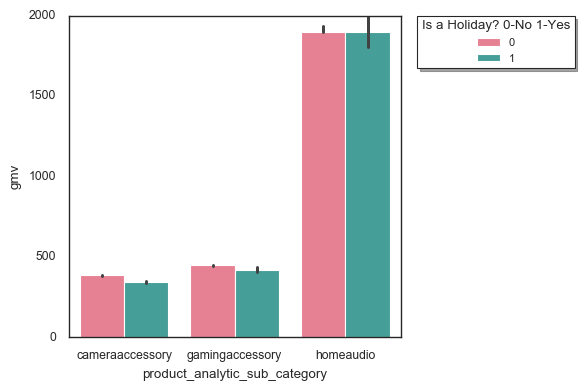

In [169]:
# Plot for avg revenue for holiday/non holiday

plt.figure(figsize=(8,5), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("white") 
sns.set_context("paper") 

sns.barplot(y='gmv', x='product_analytic_sub_category', hue ='occassion_flag', \
            palette='husl', data=product_sub_category, estimator=np.median)


plt.legend(frameon=True, fontsize='small', shadow='True', title='Is a Holiday? 0-No 1-Yes', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()


plt.show()

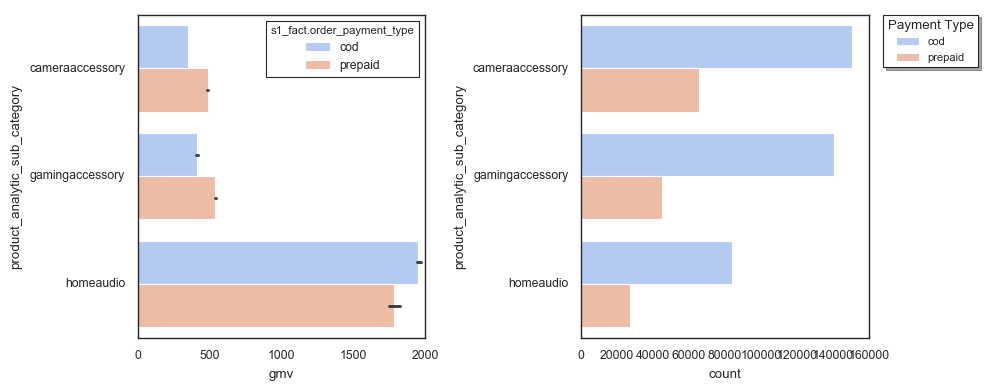

In [170]:
#Plotting the amount of sales and the reveunue generated for all payment type

plt.figure(figsize=(10,4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("white") 
sns.set_context("paper")

plt.subplot(1, 2, 1)
sns.barplot(x='gmv', y='product_analytic_sub_category', hue ='s1_fact.order_payment_type', \
            palette='coolwarm', data=product_sub_category, estimator=np.median)

plt.subplot(1, 2, 2)
sns.countplot(y='product_analytic_sub_category', hue ='s1_fact.order_payment_type', palette='coolwarm', data=product_sub_category)

plt.legend(frameon=True, fontsize='small', shadow='True', title='Payment Type', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()

plt.show()

In [171]:
# Exploring to understand the contribution of cash on delivery and prepaid
product_sub_category['prepaid'] = product_sub_category['s1_fact.order_payment_type'].apply(lambda x:1 if x=='prepaid' else 0)
product_sub_category['cod'] = product_sub_category['s1_fact.order_payment_type'].apply(lambda x:1 if x=='cod' else 0)
product_sub_category.head()

,order_date,Year,Month,Week,gmv,list_price,Discount%,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,payday_flag,occassion_flag,product_type,prepaid,cod
0,2015-10-17 15:11:54,2015,10,42,6400.0,6400.0,10.99,1,0.0,0.0,cod,5,-7.79175582905735E+018,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,luxury,0,1
1,2015-10-19 10:07:22,2015,10,43,6900.0,6900.0,4.03,1,0.0,0.0,cod,7,7.33541149097431E+018,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,luxury,0,1
2,2015-10-20 15:45:56,2015,10,43,1990.0,1990.0,5.19,1,0.0,0.0,cod,10,-7.47768776228657E+018,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0,mass_market,0,1
3,2015-10-14 12:05:15,2015,10,42,1690.0,1690.0,19.49,1,0.0,0.0,prepaid,4,-5.83593163877661E+018,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,1,0,mass_market,1,0
4,2015-10-17 21:25:03,2015,10,42,1618.0,1618.0,22.92,1,0.0,0.0,prepaid,6,5.34735360997242E+017,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0,mass_market,1,0


In [210]:
payment_method = pd.DataFrame(product_sub_category.groupby('product_analytic_sub_category')['prepaid','cod'].sum().reset_index())
payment_method

NameError: name 'product_sub_category' is not defined

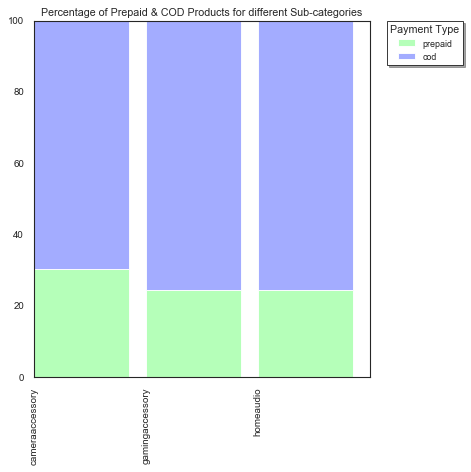

In [173]:
r = [0,1,2]
totals = [i+j for i,j in zip(payment_method['prepaid'], payment_method['cod'])]
prepaid = [i / j * 100 for i,j in zip(payment_method['prepaid'], totals)]
cod = [i / j * 100 for i,j in zip(payment_method['cod'], totals)]
names = list(payment_method['product_analytic_sub_category'])

plt.figure(figsize=(6,6), dpi=80, facecolor='w', edgecolor='k')

barWidth = 0.85

plt.bar(r, prepaid, color='#b5ffb9', edgecolor='white', width=barWidth)

plt.bar(r, cod, bottom=[i for i in prepaid], color='#a3acff', edgecolor='white', width=barWidth)

plt.xticks(r, names, rotation='vertical')
plt.legend(['prepaid','cod'],frameon=True, fontsize='small', shadow='True', title='Payment Type', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Prepaid & COD Products for different Sub-categories")

plt.tight_layout()
plt.show()

In [174]:
# Building Models ( Linear Regression )

In [175]:
# generating a copy of primary dataframe
cameraaccessory_org_df = camera_accessory_df1.copy()
gamingaccessory_org_df = gaming_accessory_df1.copy()
homeaudio_org_df = home_audio_df1.copy()
homeaudio_org_df.head()


,Week,gmv,Discount%,deliverybdays,deliverycdays,sla,product_procurement_sla,is_cod,is_mass_market,product_vertical_djcontroller,product_vertical_dock,product_vertical_dockingstation,product_vertical_fmradio,product_vertical_hifisystem,product_vertical_homeaudiospeaker,product_vertical_karaokeplayer,product_vertical_slingbox,product_vertical_soundmixer,product_vertical_voicerecorder,payday_week,holiday_week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,Total_Investment_Ad_Stock,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,TV_Ad_Stock,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Digital_Ad_Stock,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Sponsorship_Ad_Stock,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Content_Marketing_Ad_Stock,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Online_marketing_Ad_Stock,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,Affiliates_Ad_Stock,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,SEM_Ad_Stock,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Radio_Ad_Stock,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8,Other_Ad_Stock,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Sale
25,28,4.573783e+06,31.450813,0.0,0.0,7.369201,2.863223,1583,1366,8,33,1,516.0,23,1374.0,0,0,0,63,0,0,4.265,0.000,0.0000,4.265000,4.265000,0.054,0.000000,0.0000,0.054000,0.054000,0.633,0.000000,0.0000,0.633000,0.633000,1.854,0.000,0.0000,1.854000,1.854000,0.0,0.0,0.0,0.0,0.0,0.332,0.000,0.0000,0.332,0.332000,0.137,0.000000,0.0000,0.137000,0.137000,1.256,0.000,0.0000,1.256000,1.256000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.599588,0.000000,0.000000,1177.0,0.000000,0.0,28.0,12.5,20.100000,0.283333,2.383333,4.416667,0.0,4.416667,0.0,0
26,29,5.371525e+06,32.966657,0.0,0.0,6.984861,2.746318,1868,1610,7,50,1,574.0,42,1623.0,0,0,0,69,1,0,4.265,0.000,0.0000,4.265000,6.824000,0.054,0.000000,0.0000,0.054000,0.086400,0.633,0.000000,0.0000,0.633000,1.012800,1.854,0.000,0.0000,1.854000,2.966400,0.0,0.0,0.0,0.0,0.0,0.332,0.000,0.0000,0.332,0.531200,0.137,0.000000,0.0000,0.137000,0.219200,1.256,0.000,0.0000,1.256000,2.009600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.599588,0.000000,0.000000,1177.0,0.000000,0.0,33.0,11.0,23.183333,0.000000,5.183333,1.400000,0.0,1.400000,0.0,2
27,30,4.679828e+06,32.357350,0.0,0.0,7.071749,2.860538,1758,1569,4,56,0,577.0,36,1430.0,0,0,0,46,0,0,4.265,4.265,0.0000,4.265000,8.359400,0.054,0.054000,0.0000,0.054000,0.105840,0.633,0.633000,0.0000,0.633000,1.240680,1.854,1.854,0.0000,1.854000,3.633840,0.0,0.0,0.0,0.0,0.0,0.332,0.332,0.0000,0.332,0.650720,0.137,0.137000,0.0000,0.137000,0.268520,1.256,1.256,0.0000,1.256000,2.461760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.599588,54.599588,0.000000,1177.0,1177.000000,0.0,31.5,14.5,23.060000,0.000000,5.060000,1.080000,0.0,1.080000,0.0,0
28,31,3.451151e+06,32.207530,0.0,0.0,7.200750,2.734834,1244,1072,2,43,0,420.0,20,1025.0,0,0,0,44,1,0,4.265,4.265,0.0000,4.265000,9.280640,0.054,0.054000,0.0000,0.054000,0.117504,0.633,0.633000,0.0000,0.633000,1.377408,1.854,1.854,0.0000,1.854000,4.034304,0.0,0.0,0.0,0.0,0.0,0.332,0.332,0.0000,0.332,0.722432,0.137,0.137000,0.0000,0.137000,0.298112,1.256,1.256,0.0000,1.256000,2.733056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.599588,54.599588,0.000000,1177.0,1177.000000,0.0,33.5,16.0,24.566667,0.000000,6.566667,4.633333,0.0,4.633333,0.0,0
29,32,2.599000e+03,16.130000,0.0,0.0,9.000000,2.000000,0,0,0,0,0,0.0,0,1.0,0,0,0,0,0,0,1.013,3.181,3.6146,3.542333,6.581384,0.001,0.036333,0.0434,0.042222,0.071502,0.256,0.507333,0.5576,0.549222,1.082445,0.213,1.307,1.5258,1.489333,2.633582,0.0,0.0,0.0,0.0,0.0,0.026,0.230,0.2708,0.264,0.459459,0.015,0.096333,0.1126,0.109889,0.193867,0.503,1.005,1.1054,1.088667,2.142834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.987101,56.395426,55.677091

In [176]:
#Removing and Rescaling the features

camera_accessory_df1 = camera_accessory_df1.drop('Week', axis=1)
gaming_accessory_df1 = gaming_accessory_df1.drop('Week', axis=1)
home_audio_df1 = home_audio_df1.drop('Week', axis=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

camera_accessory_df1[camera_accessory_df1.columns]=scaler.fit_transform(camera_accessory_df1[camera_accessory_df1.columns])
gaming_accessory_df1[gaming_accessory_df1.columns]=scaler.fit_transform(gaming_accessory_df1[gaming_accessory_df1.columns])
home_audio_df1[home_audio_df1.columns]=scaler.fit_transform(home_audio_df1[home_audio_df1.columns])
camera_accessory_df1.head()

C:\Users\jyotiswm\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jyotiswm\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\jyotiswm\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jyotiswm\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\jyotiswm\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625:

,gmv,Discount%,deliverybdays,deliverycdays,sla,product_procurement_sla,is_cod,is_mass_market,product_vertical_cameraaccessory,product_vertical_camerabag,product_vertical_camerabattery,product_vertical_camerabatterycharger,product_vertical_camerabatterygrip,product_vertical_cameraeyecup,product_vertical_camerafilmrolls,product_vertical_camerahousing,product_vertical_cameraledlight,product_vertical_cameramicrophone,product_vertical_cameramount,product_vertical_cameraremotecontrol,product_vertical_cameratripod,product_vertical_extensiontube,product_vertical_filter,product_vertical_flash,product_vertical_flashshoeadapter,product_vertical_lens,product_vertical_reflectorumbrella,product_vertical_softbox,product_vertical_strap,product_vertical_teleconverter,product_vertical_telescope,payday_week,holiday_week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,Total_Investment_Ad_Stock,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,TV_Ad_Stock,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Digital_Ad_Stock,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Sponsorship_Ad_Stock,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Content_Marketing_Ad_Stock,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Online_marketing_Ad_Stock,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,Affiliates_Ad_Stock,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,SEM_Ad_Stock,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Radio_Ad_Stock,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8,Other_Ad_Stock,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Sale
25,-0.463986,-0.568488,-0.621962,-0.622705,0.975873,0.285022,-0.682393,-0.752433,0.406002,0.158350,0.000000,-0.413214,2.553918,-0.697481,-1.277445,-0.415704,-0.252646,-0.533081,-1.137094,0.707957,-0.429629,-0.879137,-0.032741,-1.205263,-0.204124,-0.439768,-0.193247,-0.428571,-1.309203,-0.142857,-0.997060,-1.083473,-0.531085,-1.138791,-1.631086,-1.699859,-1.633405,-1.649491,-1.251808,-1.419631,-1.491854,-1.652729,-1.518317,0.060467,-0.830498,-0.901105,0.077377,-0.554946,-0.868524,-1.264503,-1.318554,-1.299296,-1.278783,-0.696231,-0.794039,-0.910286,-1.146903,-0.916735,-1.849822,-2.030452,-2.004557,-1.933248,-2.030119,-1.887653,-2.094357,-2.029475,-1.901528,-2.051610,-0.283006,-1.038332,-1.119630,-0.486269,-0.870528,-0.464728,-0.568343,-0.656871,-0.816574,-0.666236,-0.444639,-0.540838,-0.63299,-0.787503,-0.637838,1.241485,-4.575500,-3.282764,0.138750,-4.698897,-3.338503,0.737609,1.051735,0.904298,-0.994318,0.392712,0.452202,-0.359762,0.347311,-0.269021,-0.478426
26,-0.261122,-0.524957,-0.621962,-0.622705,0.194883,0.370449,-0.599711,-0.648998,-0.266187,0.323447,0.215047,-0.399653,0.483174,-0.697481,-1.277445,-0.415704,-0.252646,-0.533081,-0.654105,0.728597,-0.287038,-0.879137,-0.306924,-1.203913,-0.204124,-0.324809,-0.193247,-0.428571,-0.505563,-0.142857,-0.647623,0.922958,-0.531085,-1.138791,-1.631086,-1.699859,-1.633405,-1.532676,-1.251808,-1.419631,-1.491854,-1.652729,-1.494622,0.060467,-0.830498,-0.901105,0.077377,-0.290548,-0.868524,-1.264503,-1.318554,-1.299296,-1.188393,-0.696231,-0.794039,-0.910286,-1.146903,-0.916735,-1.849822,-2.030452,-2.004557,-1.933248,-1.984615,-1.887653,-2.094357,-2.029475,-1.901528,-1.990966,-0.283006,-1.038332,-1.119630,-0.486269,-0.660863,-0.464728,-0.568343,-0.656871,-0.816574,-0.666236,-0.444639,-0.540838,-0.63299,-0.787503,-0.637838,1.241485,-4.575500,-3.282764,0.138750,-4.698897,-3.338503,1.269795,0.882827,1.256121,-1.034268,1.651885,-0.413172,-0.359762,-0.459971,-0.269021,0.814617
27,-0.271684,-0.611923,-0.620334,-0.619954,0.221648,0.511811,-0.586375,-0.662790,0.540440,-0.114420,0.287886,-0.114865,1.173422,-0.697481,-1.277445,-0.415704,-0.252646,-0.533081,-0.930099,0.026832,-0.358333,-0.879137,-0.306924,-1.198514,-0.204124,-0.17877

In [177]:
# Splitting the dataset in test and train sets
from sklearn.model_selection import train_test_split


camera_accessory_train, camera_accessory_test = train_test_split(camera_accessory_df1, \
                                                               train_size = 0.7, test_size = 0.3, random_state = 100)

gaming_accessory_train, gaming_accessory_test = train_test_split(gaming_accessory_df1, \
                                                               train_size = 0.7, test_size = 0.3, random_state = 100)

home_audio_train, home_audio_test = train_test_split(home_audio_df1, \
                                                               train_size = 0.7, test_size = 0.3, random_state = 100)

In [178]:
# Taking target variable out for train set

y_camera_accessory_train = camera_accessory_train.pop('gmv')
X_camera_accessory_train = camera_accessory_train

y_gaming_accessory_train = gaming_accessory_train.pop('gmv')
X_gaming_accessory_train = gaming_accessory_train

y_home_audio_train = home_audio_train.pop('gmv')
X_home_audio_train = home_audio_train

X_camera_accessory_train.head()

,Discount%,deliverybdays,deliverycdays,sla,product_procurement_sla,is_cod,is_mass_market,product_vertical_cameraaccessory,product_vertical_camerabag,product_vertical_camerabattery,product_vertical_camerabatterycharger,product_vertical_camerabatterygrip,product_vertical_cameraeyecup,product_vertical_camerafilmrolls,product_vertical_camerahousing,product_vertical_cameraledlight,product_vertical_cameramicrophone,product_vertical_cameramount,product_vertical_cameraremotecontrol,product_vertical_cameratripod,product_vertical_extensiontube,product_vertical_filter,product_vertical_flash,product_vertical_flashshoeadapter,product_vertical_lens,product_vertical_reflectorumbrella,product_vertical_softbox,product_vertical_strap,product_vertical_teleconverter,product_vertical_telescope,payday_week,holiday_week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,Total_Investment_Ad_Stock,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,TV_Ad_Stock,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Digital_Ad_Stock,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Sponsorship_Ad_Stock,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Content_Marketing_Ad_Stock,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Online_marketing_Ad_Stock,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,Affiliates_Ad_Stock,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,SEM_Ad_Stock,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Radio_Ad_Stock,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8,Other_Ad_Stock,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Sale
0,0.060657,-0.621962,-0.622705,-0.497921,0.553036,0.893232,0.627852,0.540440,-0.222092,-0.381535,-0.155549,-0.897323,0.381098,-0.169421,-0.415704,3.958114,-0.533081,0.656865,-0.385971,0.380768,0.206217,-0.105319,1.488997,-0.204124,0.010750,-0.193247,-0.428571,-0.359446,-0.142857,-0.123468,-1.083473,-0.531085,0.186504,0.776833,0.987797,0.863692,0.704290,0.354300,0.677298,0.802561,0.729798,0.657683,-0.605542,-0.025604,0.163219,0.064486,-0.158850,-0.997170,0.476156,0.908352,0.606863,0.225891,0.307176,0.494556,0.605060,0.628475,0.480500,1.062276,1.065636,1.085006,0.986779,1.059869,1.168223,1.032135,1.011728,0.949932,1.043430,-0.391566,0.275496,0.505240,0.448532,0.169488,3.459358,1.031321,0.382238,0.681314,1.525878,3.205892,0.939272,0.342332,0.586754,1.393930,-0.598617,-0.115920,0.048808,-1.446603,-0.319129,-0.095847,-1.071822,-1.932310,-1.381597,1.494331,-0.679084,1.441884,2.654145,1.894972,-0.269021,-0.478426
1,-0.040097,-0.620341,-0.621199,0.437612,-0.028840,0.045075,-0.197331,0.540440,-0.336942,-0.770007,-0.365749,0.023008,0.021572,0.152264,-0.415704,-0.252646,-0.533081,0.035879,-0.633653,-0.087409,0.206217,-0.048869,0.240405,-0.204124,-0.377628,-0.193247,-0.428571,0.371136,-0.142857,-0.356426,0.922958,-0.531085,0.186504,0.504406,0.813250,0.755053,0.531642,0.354300,0.536876,0.712778,0.690811,0.572284,-0.605542,-0.344432,-0.055139,-0.199758,-0.414193,-0.997170,-0.300930,0.402233,0.136855,-0.350919,0.307176,0.423250,0.555838,0.610571,0.453296,1.062276,1.083691,1.095841,1.051716,1.101323,1.168223,1.112439,1.059082,1.038233,1.123928,-0.391566,-0.069779,0.273401,0.198646,-0.094166,3.459358,2.630985,1.421348,1.846339,2.841147,3.205892,2.419383,1.317654,1.655621,2.612992,-0.598617,-0.074344,0.067514,-1.446603,-0.299527,-0.087123,-1.763663,-1.707099,-1.815194,2.030130,-0.679084,-0.088059,-0.359762,-0.156683,6.323587,-0.478426
10,0.043235,-0.420785,-0.405268,-0.666914,-0.470323,0.223108,0.396272,-0.736719,-0.164667,1.359652,1.485374,-0.437157,0.021572,0.188007,-0.415704,-0.252646,2.730682,0.656865,-0.117649,-0.296544,0.748895,-0.355309,0.486074,-0.204124,-0.455304,-0.193247,-0.428571,0.955601,-0.142857,0.983082,-1.083473,1.882938,0.785597,0.880521,0.321637,0.463286,0.648741,2.25200

In [179]:
# Taking target variable out for test set

y_camera_accessory_test = camera_accessory_test.pop('gmv')
X_camera_accessory_test = camera_accessory_test

y_gaming_accessory_test = gaming_accessory_test.pop('gmv')
X_gaming_accessory_test = gaming_accessory_test

y_homeaudio_test = homeaudio_test.pop('gmv')
X_homeaudio_test = homeaudio_test

X_camera_accessory_test.head()

,Discount%,deliverybdays,deliverycdays,sla,product_procurement_sla,is_cod,is_mass_market,product_vertical_cameraaccessory,product_vertical_camerabag,product_vertical_camerabattery,product_vertical_camerabatterycharger,product_vertical_camerabatterygrip,product_vertical_cameraeyecup,product_vertical_camerafilmrolls,product_vertical_camerahousing,product_vertical_cameraledlight,product_vertical_cameramicrophone,product_vertical_cameramount,product_vertical_cameraremotecontrol,product_vertical_cameratripod,product_vertical_extensiontube,product_vertical_filter,product_vertical_flash,product_vertical_flashshoeadapter,product_vertical_lens,product_vertical_reflectorumbrella,product_vertical_softbox,product_vertical_strap,product_vertical_teleconverter,product_vertical_telescope,payday_week,holiday_week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,Total_Investment_Ad_Stock,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,TV_Ad_Stock,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Digital_Ad_Stock,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Sponsorship_Ad_Stock,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Content_Marketing_Ad_Stock,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Online_marketing_Ad_Stock,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,Affiliates_Ad_Stock,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,SEM_Ad_Stock,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Radio_Ad_Stock,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8,Other_Ad_Stock,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Sale
31,-0.928400,-0.621962,-0.622705,4.262882,-1.795333,-1.954629,-2.215467,-2.686066,-2.231974,-2.393266,-1.925303,-1.587571,-0.697481,-1.277445,-0.415704,-0.252646,-0.533081,-1.413087,-2.202304,-1.463421,-0.879137,-1.806869,-1.240358,-0.204124,-1.949783,-0.193247,-0.428571,-2.258960,-0.142857,-1.928891,0.922958,-0.531085,-1.440518,-1.529340,-1.521451,-1.923297,-1.688655,-1.333579,-1.417973,-1.471353,-1.723976,-1.545080,-0.423320,-0.454946,-0.346170,-0.476226,-0.483543,-1.131096,-1.226673,-1.214215,-1.569611,-1.349286,-0.696231,-0.794039,-0.910286,-1.146903,-0.916735,-2.015055,-2.016227,-1.956838,-2.048812,-2.071647,-2.106313,-2.067589,-1.960372,-2.048923,-2.100098,-0.679831,-0.739753,-0.685445,-0.925896,-0.816907,-0.464728,-0.568343,-0.656871,-0.816574,-0.666236,-0.444639,-0.540838,-0.632990,-0.787503,-0.637838,2.562141,1.211033,0.978363,0.506552,0.366960,0.400771,0.844047,1.220643,0.921414,-0.928518,0.670030,-0.814782,-0.359762,-0.834621,-0.269021,1.461139
11,0.167884,0.429363,0.433071,-0.840190,-0.549591,-0.322326,0.691637,-0.871157,0.215775,1.383932,2.136318,-0.667240,0.381098,0.330978,-0.415704,-0.252646,3.274642,-0.447110,0.191953,-0.118304,0.748895,0.015645,0.711495,-0.204124,-0.138387,-0.193247,1.000000,0.078903,-0.142857,0.575406,0.922958,1.882938,0.785597,0.880521,0.651896,0.645360,0.793068,2.252007,2.436440,1.978224,1.895612,2.275711,-0.078124,-0.060323,-0.069539,-0.299714,-0.117269,0.498420,0.582069,0.375435,0.223249,0.471124,-0.281489,-0.320366,-0.334853,-0.287599,-0.340957,0.459661,0.491172,0.448575,0.570794,0.489299,0.652040,0.678799,0.604480,0.706007,0.660870,-0.260872,-0.267843,-0.300286,-0.494134,-0.344308,0.802606,0.981554,0.685504,1.008867,0.922381,1.703747,2.072356,1.662970,1.928511,2.008609,-0.126119,0.153167,0.281961,-1.915867,-0.435344,-0.047244,-0.539636,-0.918861,-0.605142,0.534860,-0.679084,-0.003366,0.341433,0.067598,-0.269021,-0.478426
12,0.508729,1.718407,1.722050,-0.439781,-0.662751,-1.803934,0.696234,-0.736719,0.158350,0.274012,0.590325,-0.437157,0.381098,0.116521,-0.415704,-0.252646,2.186721,0.449870,-0.385971,0.288083,0.748895,-0.298860,0.851877,-0.204124,0.094640,-0.193247,-0.428571,0.663368,-0.142857,0.750124,-1.083473,-0.531085,-0.215890,

In [180]:
# Performing Liner regression for cameraaccessory
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

cameraaccessory_model = LinearRegression().fit(X_camera_accessory_train, y_camera_accessory_train)
y_camera_accessory_test_pred = cameraaccessory_model.predict(X_camera_accessory_test)

print('R2_Score: {}'.format(r2_score(y_camera_accessory_test, y_camera_accessory_test_pred)))
print('Mean_Squared_Error: {}'.format(mean_squared_error(y_camera_accessory_test, y_camera_accessory_test_pred)))

R2 Score: 0.8277391712124688
Mean Squared Error: 0.170485918646526


In [181]:
# Performing Liner regression for cameraaccessory using K fold validation
y_cameraaccessory = camera_accessory_df1.pop('gmv')
X_cameraaccessory = camera_accessory_df1

In [182]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics

cameraaccessory_model_cv = LinearRegression().fit(X_cameraaccessory, y_cameraaccessory)
cameraaccessory_predictions_cv = cross_val_predict(cameraaccessory_model_cv, X_cameraaccessory, y_cameraaccessory, cv=10)
accuracy = metrics.r2_score(y_cameraaccessory, cameraaccessory_predictions_cv)
print("Cross Predicted Accuracy:", accuracy)
print('Mean_Squared_Error: {}'.format(mean_squared_error(y_cameraaccessory, cameraaccessory_predictions_cv)))

Cross-Predicted Accuracy: -0.07749313506669586
Mean Squared Error: 1.0774931350666959


In [183]:
#as the r2 value is below zero, the model will be a bad fit

In [184]:
# Checking important features

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 
pd.set_option('display.precision',1)


cameraaccessory_lr_model_parameters = list(cameraaccessory_model.coef_)
cameraaccessory_lr_model_parameters.insert(0, cameraaccessory_model.intercept_)
cameraaccessory_lr_model_parameters = [round(x, 3) for x in cameraaccessory_lr_model_parameters]
cols = X_camera_accessory_test.columns
cols = cols.insert(0, "constant")
cameraaccessory_lr_coef = list(zip(cols, cameraaccessory_lr_model_parameters))
cameraaccessory_lr_coef

[('constant', -0.043),
 ('Discount%', 0.015),
 ('deliverybdays', -0.047),
 ('deliverycdays', -0.047),
 ('sla', 0.005),
 ('product_procurement_sla', 0.035),
 ('is_cod', 0.032),
 ('is_mass_market', 0.074),
 ('product_vertical_cameraaccessory', 0.042),
 ('product_vertical_camerabag', 0.182),
 ('product_vertical_camerabattery', 0.2),
 ('product_vertical_camerabatterycharger', -0.072),
 ('product_vertical_camerabatterygrip', 0.09),
 ('product_vertical_cameraeyecup', -0.031),
 ('product_vertical_camerafilmrolls', -0.138),
 ('product_vertical_camerahousing', 0.171),
 ('product_vertical_cameraledlight', -0.037),
 ('product_vertical_cameramicrophone', -0.06),
 ('product_vertical_cameramount', 0.11),
 ('product_vertical_cameraremotecontrol', -0.108),
 ('product_vertical_cameratripod', -0.018),
 ('product_vertical_extensiontube', 0.065),
 ('product_vertical_filter', 0.105),
 ('product_vertical_flash', 0.018),
 ('product_vertical_flashshoeadapter', -0.007),
 ('product_vertical_lens', 0.432),
 ('pr

In [185]:
cameraaccessory_lr_coef_df = pd.DataFrame(cameraaccessory_lr_coef)
col_rename = {0:'Features',1: 'Coefficients'}
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.rename(columns=col_rename)
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.iloc[1:,:]
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.loc[cameraaccessory_lr_coef_df['Coefficients']!=0.0]
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.sort_values(by=['Coefficients'], ascending = False)
cameraaccessory_lr_coef_df

,Features,Coefficients
25,product_vertical_lens,0.432
10,product_vertical_camerabattery,0.200
9,product_vertical_camerabag,0.182
15,product_vertical_camerahousing,0.171
58,Online marketing,0.151
18,product_vertical_cameramount,0.110
63,Affiliates,0.107
22,product_vertical_filter,0.105
84,NPS_SMA_3,0.095
12,product_vertical_camerabatterygrip,0.090


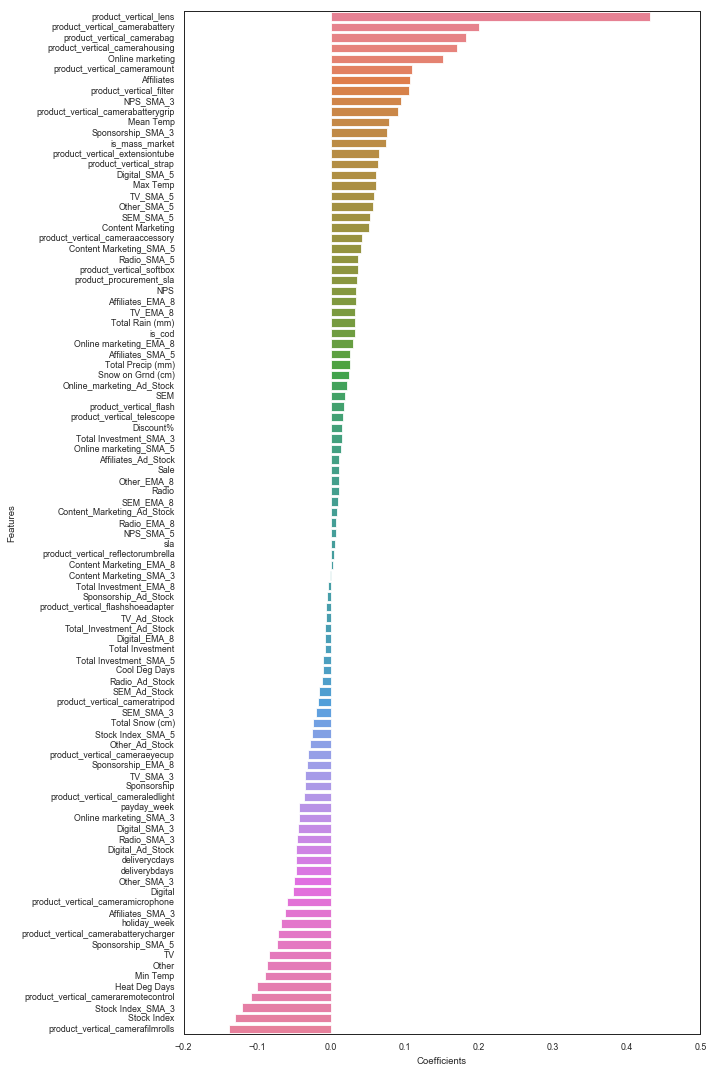

In [212]:
plt.figure(figsize=(10, 15) )
sns.barplot(y='Features', x='Coefficients', palette='husl', data=cameraaccessory_lr_coef_df, estimator=np.sum)
plt.tight_layout()

plt.show()

In [187]:
#The important features
#Features                      Coefficients
#product_vertical_lens          0.432
#product_vertical_camerabattery 0.200
#product_vertical_camerabag     0.182
#product_vertical_camerahousing 0.171
#Online marketing               0.151

In [188]:
# Performing Liner regression for gamingaccessory
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

gamingaccessory_model = LinearRegression().fit(X_gaming_accessory_train, y_gaming_accessory_train)
y_gaming_accessory_test_pred = gamingaccessory_model.predict(X_gaming_accessory_test)

print('R2 Score: {}'.format(r2_score(y_gaming_accessory_test, y_gaming_accessory_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_gaming_accessory_test, y_gaming_accessory_test_pred)))

R2 Score: 0.9334637176804224
Mean Squared Error: 0.053251578762301965


In [189]:
# Performing Liner regression for gamingaccesory using K fold validation
y_gamingaccessory = gaming_accessory_df1.pop('gmv')
X_gamingaccessory = gaming_accessory_df1

In [190]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics

gamingaccessory_model_cv = LinearRegression().fit(X_gamingaccessory, y_gamingaccessory)
gamingaccessory_predictions_cv = cross_val_predict(gamingaccessory_model_cv, X_gamingaccessory, y_gamingaccessory, cv=10)
accuracy = metrics.r2_score(y_gamingaccessory, gamingaccessory_predictions_cv)
print("Cross Predicted Accuracy:", accuracy)
print('Mean_Squared_Error: {}'.format(mean_squared_error(y_gamingaccessory, gamingaccessory_predictions_cv)))

Cross-Predicted Accuracy: 0.5113679167194114
Mean Squared Error: 0.48863208328058866


In [191]:
# Checking important features
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 
pd.set_option('display.precision',1)


gamingaccessory_lr_model_parameters = list(gamingaccessory_model.coef_)
gamingaccessory_lr_model_parameters.insert(0, gamingaccessory_model.intercept_)
gamingaccessory_lr_model_parameters = [round(x, 3) for x in gamingaccessory_lr_model_parameters]
cols = X_gaming_accessory_test.columns
cols = cols.insert(0, "constant")
gamingaccessory_lr_coef = list(zip(cols, gamingaccessory_lr_model_parameters))
gamingaccessory_lr_coef

[('constant', 0.021),
 ('Discount%', -0.003),
 ('deliverybdays', 0.015),
 ('deliverycdays', 0.015),
 ('sla', 0.051),
 ('product_procurement_sla', 0.025),
 ('is_cod', 0.064),
 ('is_mass_market', 0.167),
 ('product_vertical_gamecontrolmount', -0.013),
 ('product_vertical_gamepad', 0.201),
 ('product_vertical_gamingaccessorykit', 0.126),
 ('product_vertical_gamingadapter', 0.039),
 ('product_vertical_gamingchargingstation', 0.009),
 ('product_vertical_gamingheadset', 0.183),
 ('product_vertical_gamingkeyboard', 0.068),
 ('product_vertical_gamingmemorycard', 0.028),
 ('product_vertical_gamingmouse', 0.107),
 ('product_vertical_gamingmousepad', -0.003),
 ('product_vertical_gamingspeaker', 0.038),
 ('product_vertical_joystickgamingwheel', 0.089),
 ('product_vertical_motioncontroller', 0.056),
 ('product_vertical_tvoutcableaccessory', 0.091),
 ('payday_week', -0.035),
 ('holiday_week', -0.016),
 ('Total Investment', 0.001),
 ('Total Investment_SMA_3', 0.001),
 ('Total Investment_SMA_5', 0.021

In [192]:

gamingaccessory_lirg_coeff_df = pd.DataFrame(gamingaccessory_lr_coef)
col_rename = {0:'Features',1: 'Coefficients'}
gamingaccessory_lirg_coeff_df = gamingaccessory_lirg_coeff_df.rename(columns=col_rename)
gamingaccessory_lirg_coeff_df = gamingaccessory_lirg_coeff_df.iloc[1:,:]
gamingaccessory_lirg_coeff_df = gamingaccessory_lirg_coeff_df.loc[gamingaccessory_lirg_coeff_df['Coefficients']!=0.0]
gamingaccessory_lirg_coeff_df = gamingaccessory_lirg_coeff_df.sort_values(by=['Coefficients'], ascending = False)
gamingaccessory_lirg_coeff_df

,Features,Coefficients
9,product_vertical_gamepad,0.201
13,product_vertical_gamingheadset,0.183
7,is_mass_market,0.167
10,product_vertical_gamingaccessorykit,0.126
16,product_vertical_gamingmouse,0.107
21,product_vertical_tvoutcableaccessory,0.091
19,product_vertical_joystickgamingwheel,0.089
84,Cool Deg Days,0.085
29,TV,0.078
14,product_vertical_gamingkeyboard,0.068


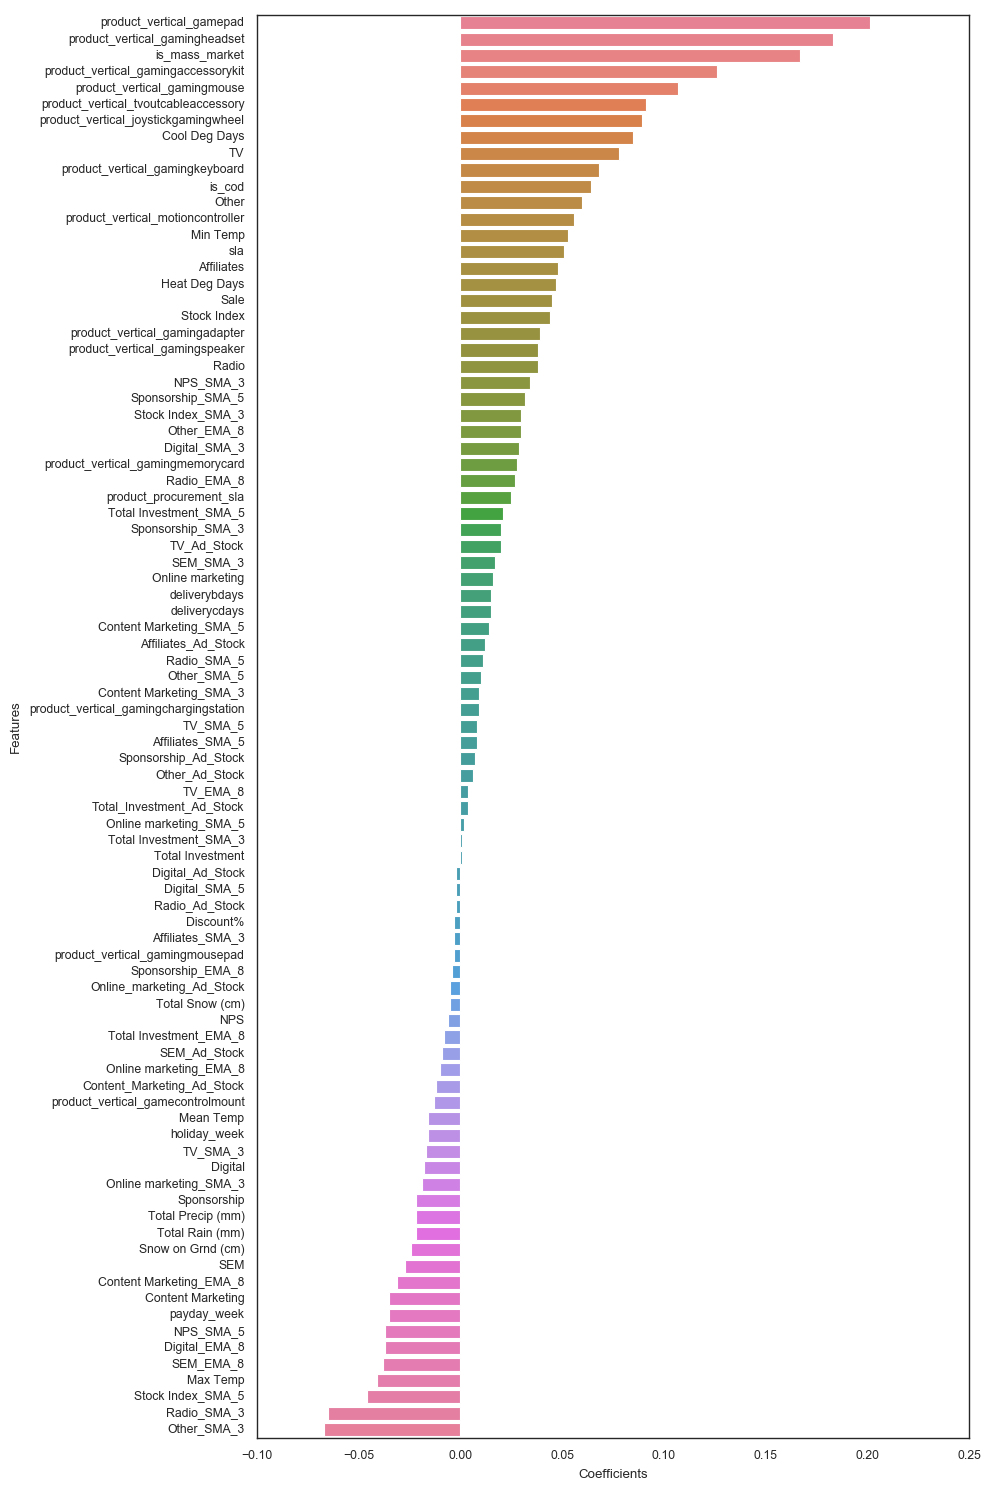

In [193]:
plt.figure(figsize=(10, 15))
sns.barplot(y='Features', x='Coefficients', palette='husl', data=gamingaccessory_lirg_coeff_df, estimator=np.sum)
plt.tight_layout()

plt.show()

In [194]:
#Important Features
#Features                            Coefficients
#product_vertical_gamepad             0.201
#product_vertical_gamingheadset       0.183
#is_mass_market                       0.167
#product_vertical_gamingaccessorykit  0.126
#product_vertical_gamingmouse         0.107

In [195]:
# Performing Liner regression for cameraaccessory
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

homeaudio_model = LinearRegression().fit(X_home_audio_train, y_home_audio_train)
y_homeaudio_test_pred = homeaudio_model.predict(X_homeaudio_test)

print('R2_Score: {}'.format(r2_score(y_homeaudio_test, y_homeaudio_test_pred)))
print('Mean_Squared_Error: {}'.format(mean_squared_error(y_homeaudio_test, y_homeaudio_test_pred)))

R2 Score: 0.9608086220946002
Mean Squared Error: 0.09397173521656912


In [196]:
# Performing Liner regression for homeaudio using K fold validation
y_homeaudio = home_audio_df1.pop('gmv')
X_homeaudio = home_audio_df1

In [197]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics

homeaudio_model_cv = LinearRegression().fit(X_homeaudio, y_homeaudio)
homeaudio_predictions_cv = cross_val_predict(homeaudio_model_cv, X_homeaudio, y_homeaudio, cv=5)
accuracy = metrics.r2_score(y_homeaudio, homeaudio_predictions_cv)
print("CrossPredicted Accuracy:", accuracy)
print('Mean_Squared_Error: {}'.format(mean_squared_error(y_homeaudio, homeaudio_predictions_cv)))

Cross-Predicted Accuracy: 0.7260604462246432
Mean Squared Error: 0.27393955377535667


In [198]:
# Checking important features
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 
pd.set_option('display.precision',1)


homeaudio_lr_model_parameters = list(homeaudio_model.coef_)
homeaudio_lr_model_parameters.insert(0, homeaudio_model.intercept_)
homeaudio_lr_model_parameters = [round(x, 3) for x in homeaudio_lr_model_parameters]
cols = homeaudio_test.columns
cols = cols.insert(0, "constant")
homeaudio_lr_coef = list(zip(cols, homeaudio_lr_model_parameters))
homeaudio_lr_coef

[('constant', -0.009),
 ('Discount%', 0.015),
 ('deliverybdays', 0.016),
 ('deliverycdays', -0.001),
 ('sla', -0.121),
 ('product_procurement_sla', -0.057),
 ('is_cod', 0.131),
 ('is_mass_market', 0.148),
 ('product_vertical_djcontroller', 0.016),
 ('product_vertical_dock', 0.111),
 ('product_vertical_dockingstation', 0.019),
 ('product_vertical_fmradio', 0.133),
 ('product_vertical_hifisystem', 0.05),
 ('product_vertical_homeaudiospeaker', 0.392),
 ('product_vertical_karaokeplayer', 0.0),
 ('product_vertical_slingbox', 0.054),
 ('product_vertical_soundmixer', 0.028),
 ('product_vertical_voicerecorder', -0.069),
 ('payday_week', 0.056),
 ('holiday_week', -0.049),
 ('Total Investment', -0.05),
 ('Total Investment_SMA_3', 0.019),
 ('Total Investment_SMA_5', -0.029),
 ('Total Investment_EMA_8', 0.073),
 ('Total_Investment_Ad_Stock', -0.064),
 ('TV', -0.037),
 ('TV_SMA_3', 0.025),
 ('TV_SMA_5', 0.026),
 ('TV_EMA_8', -0.012),
 ('TV_Ad_Stock', -0.022),
 ('Digital', 0.009),
 ('Digital_SMA_3',

In [199]:
home_audio_lirg_coeff_df = pd.DataFrame(homeaudio_lr_coef)
col_rename = {0:'Features',1: 'Coefficients'}
home_audio_lirg_coeff_df = home_audio_lirg_coeff_df.rename(columns=col_rename)
home_audio_lirg_coeff_df = home_audio_lirg_coeff_df.iloc[1:,:]
home_audio_lirg_coeff_df = home_audio_lirg_coeff_df.loc[home_audio_lirg_coeff_df['Coefficients']!=0.0]
home_audio_lirg_coeff_df = home_audio_lirg_coeff_df.sort_values(by=['Coefficients'], ascending = False)
home_audio_lirg_coeff_df

,Features,Coefficients
13,product_vertical_homeaudiospeaker,0.392
7,is_mass_market,0.148
31,Digital_SMA_3,0.139
11,product_vertical_fmradio,0.133
6,is_cod,0.131
9,product_vertical_dock,0.111
78,Mean Temp,0.110
53,Affiliates_EMA_8,0.103
56,SEM_SMA_3,0.094
58,SEM_EMA_8,0.091


In [214]:
plt.figure(figsize=(10, 15))
sns.barplot(y='Features', x='Coefficients', palette='husl', data=home_audio_lirg_coeff_df, estimator=np.sum)
plt.tight_layout()


plt.show()

NameError: name 'home_audio_lirg_coeff_df' is not defined

<Figure size 720x1080 with 0 Axes>

In [201]:
#Important features
#Features                           Coefficients
#product_vertical_homeaudiospeaker  0.392
#is_mass_market                     0.148
#Digital_SMA_3                      0.139
#product_vertical_fmradio           0.133
#is_cod                             0.131